## DSC680 4.1 Project 1: Final Presentation/Milestone 3 (Code Portion)

### Project: Pay Wage Gap
##### 1. Assessing Overall U.S. Pay/Wages (Income) in Relation to Gender, Education, and Race (2020 U.S. Census Survey Data)
##### 2. Assessing Pay/Wages (Income) for Data Professionals in Relation to Gender and Work-Related Factors (2020 Data Professional Salary Survey)

### Introduction

Addressing a company’s pay gap related to gender (and race) is about more than just money – it is just as much about equity. Given the current socio-political climate, completing equity analyses to close that gap are at the forefront of myriad organizations’ minds; after all, closing this gap can bolster business performance, it benefits those who need it most, and it can strengthen the global economy (Lyons, 2019). As our world moves closer to equitable solutions, closing the wage gap is imperative for keeping and maintaining strong employees who offer culture add and much-needed perspectives within the workforce. Happier and more diverse workforces that prioritize equitable treatment and inclusion experience increased productivity, adaptability, and balance (Lyons, 2019).

For my specific project, I wanted to assess some recent U.S. Census data (2020) regarding pay and wages (income) for various cohort groups to determine what that current landscape looks like.

Additionally, I wanted to assess some income data relative to working data professionals (2020 survey), in an endeavor to view that landscape as well as how that might compare to my overall U.S. assessment. 

In other words, my research questions are as follows:

* 1. What does the current income landscape look like with respect to:
    * Gender?
    * Marital Status/Role in Household?
    * Race?
    * Ethnicity?
    * Age?
    * Educational Level?

* 2. What does the current income landscape for data professionals look like with respect to:
    * Gender?
    * Job Title?
    * Country?
    * Industry/Sector?
    * Years of Experience?
    * Management Level?
    
* 3. How do these two areas compare? What similarities or differences exist?


### Introductory Notes: Initial Plans and Final Project Selection/Direction

For this project, my original plan was to use the following datasets to assess my original project topic. My original project topic was essentially similar to what is outlined above, except that I wanted to use individual U.S. income data (versus aggregate) and I wanted to be able to make predictions about individual incomes based upon features/variables within that type of dataset. 

As I worked through some initial coding and analyses, I ran into some challenges and needed to lean on my contingency plans I had put into place for a more reasonable and successful outcome. Please see below for my notes regarding my original data work, as well as my notes regarding my new project direction (which is this final project that you see here).

* Initial Dataset #1: 
This dataset is from the U.S. Census Bureau and is an adult dataset from 1994 (https://archive.ics.uci.edu/ml/datasets/census+income) that has been compiled and housed at UCI (The Machine Learning Group). I found this dataset to be too outdated (and my project plan did not include a time series analysis) and its income data was not in the format that I desired - only two salary groupings exist in this data: equal to or less than 50,000 dollars or above 50,000 dollars. These values were not going to be useful to me for what I was interested in exploring.

* Initial Dataset #2: 
This was set to be my initial primary dataset, but unfortunately, the data and its files proved tough to deal with, or even to pull in. The data itself is sourced from the Panel Study of Income Dynamics (PSID) microdata (https://psidonline.isr.umich.edu/default.aspx) , which is collected, housed, and maintained by the University of Michigan’s Institute for Social Research and Survey Research. 

    * After trying multiple formats and methodologies for getting this data to "read in" so that I could finally work on my analyses, I decided going down this route would not be the most realistic or fruitful with the time and experience I possessed. Additionally, this data included 164 variables, and an extensive codebook. I felt that in order to successfully complete a project using this data, it would require additional skill, time, and expertise.


##### Pivoting to New Data:

Overall, I wanted to see if I would be able to utilize individual data instead of aggregate, but I also wanted to find up-to-date data that was relevant. I also wanted actual salary values (even if it meant a measure of central tendency) versus merely a classification of all salaries into one of two groups. Given this, and after some assessment/deduction, I ascertained that the best datasets for use for my project moving forward would be the below:

* Final Dataset #1:
My final first data choice was a good, old, trustworthy U.S. Census dataset. The data comes from the U.S. Census Bureau's Table 1A data (Educational Attainment, People 18 Years Old and Over by Total Money Earnings in 2020 (including Total (All) Work Experience, Age, Race, Hispanic Origin, and Sex (aggregate)). (https://www.census.gov/data/tables/2020/demo/educational-attainment/cps-detailed-tables.html)

    * This data is in the form of summary (or aggregate) data, so I will not be assessing individual incomes for individual people, but rather summary income data for cohorts/groups of people based upon my research question interests.


* Final Dataset #2:
As I was researching datasets related to the topic of income earned and wage gaps between cohorts of people, I came across an interesting dataset that included income data for data professionals. This dataset includes individual(not aggregate) data and comes from The 2020 Data Professional Salary Survey, administered by Brent Ozar Unlimited (https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/).

This data will be used to make an assessment relative to my second research question (and subsequently, my third question). 

##### References:
##### Literature and Data References Used for My Project

* Daugherty, G. (2022, March 14). Gender and income inequality. Investopedia. 
https://www.investopedia.com/history-gender-wage-gap-america-5074898

* Gould, E., Schieder, J., and Geier, K. (2016, October 20). What is the gender pay gap and is it 
real? Economic Policy Institute. https://www.epi.org/publication/what-is-the-gender-pay-
gap-and-is-it-real/

* Lyons, S. (2019, September 9). The benefits of creating a diverse workforce. Forbes. 
https://www.forbes.com/sites/forbescoachescouncil/2019/09/09/the-benefits-of-creating-
a-diverse-workforce/?sh=2f65158f140b



### Data Loading & Transformations:

In [1]:
## Import other necessary libraries for use.
import zipfile
import tempfile
import os
import requests
import shutil
import getpass

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from psid_py import read_sas
from io import BytesIO

%matplotlib inline

####  Summary (Aggregate) Data: US Census Bureau

Data Source 1: U.S. Census Bureau -  Educational Attainment, People 18 Years Old and Over by Total Money Earnings in 2020 (including Totall (All) Work Experience, Age, Race, Hispanic Origin, and Sex (aggregate - data taken from individual Census surveys))

In [2]:
## Pull in the data.
income_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC680\Data\Table A-1 - Income Summary Measures by Selected Characteristics_2020.csv")

## Display max rows.
pd.set_option('display.max_rows', 50)
## Display max columns.
pd.set_option('display.max_columns', 50)

## View the data.
income_df

Characteristic  Number (people)  Median Income
0                           All households           129931          67521
1                        Family households            83907          86372
2                           Married-couple            61454         101517
3    Female householder, no spouse present            15490          49214
4      Male householder, no spouse present             6963          67304
5                     Nonfamily households            46024          40464
6                       Female householder            24244          35574
7                         Male householder            21781          47259
8                                    White           101582          71231
9                      White, not Hispanic            85336          74912
10                                   Black            17358          45870
11                                   Asian             6987          94903
12                     Hispanic (any race)            18349          55321
13                          Under 65 years            94243          76800
14                          15 to 24 years             5485          46886
15                          25 to 34 years            20654          71566
16                          35 to 44 years            22105          85694
17                          45 to 54 years            21663          90359
18                          55 to 64 years            24336          74270
19                      65 years and older            35688          46360
20                             Native-born           110348          68795
21                            Foreign-born            19584          61984
22                     Naturalized citizen            11201          68760
23                           Not a citizen             8382          55099
24                               Northeast            22082          75211
25                                 Midwest            27865          66968
26                                   South            50385          61243
27                                    West            29600          74951
28   Inside metropolitan statistical areas           111999          70956
29                 Inside principal cities            43470          62444
30                Outside principal cities            68528          76022
31  Outside metropolitan statistical areas            17933          51616
32                Total, aged 25 and older           124446          69228
33                  No high school diploma            10052          29547
34                 High school, no college            31647          47405
35                            Some college            33646          63653
36             Bachelor's degree or higher            49102         106936

In order to get a better view of the data, and to more easily parse out the variables I want to look at, I am going to pivot this data.

First, I am going to look at the data types and assess if any missing data exists.

In [3]:
## Review the data types.
income_df.dtypes

Characteristic     object
Number (people)     int64
Median Income       int64
dtype: object

In [4]:
## Check if any missing values exist within the dataset.
income_df.isnull().values.any()

False

The data variables are being read in appropriately, and no missing values exist, so nothing to change there.

Now, on to pivoting the data for easier viewing.

In [5]:
## Pivot the data so that the rows now become the columns.
## Use transpose function.
income_transpose = income_df.T

## View data.
income_transpose

0                  1               2   \
Characteristic   All households  Family households  Married-couple   
Number (people)          129931              83907           61454   
Median Income             67521              86372          101517   

                                                    3   \
Characteristic   Female householder, no spouse present   
Number (people)                                  15490   
Median Income                                    49214   

                                                  4                     5   \
Characteristic   Male householder, no spouse present  Nonfamily households   
Number (people)                                 6963                 46024   
Median Income                                  67304                 40464   

                                 6                 7       8   \
Characteristic   Female householder  Male householder   White   
Number (people)               24244             21781  101582   
Median Income                 35574             47259   71231   

                                  9      10     11                   12  \
Characteristic   White, not Hispanic  Black  Asian  Hispanic (any race)   
Number (people)                85336  17358   6987                18349   
Median Income                  74912  45870  94903                55321   

                             13              14              15  \
Characteristic   Under 65 years  15 to 24 years  25 to 34 years   
Number (people)           94243            5485           20654   
Median Income             76800           46886           71566   

                             16              17              18  \
Characteristic   35 to 44 years  45 to 54 years  55 to 64 years   
Number (people)           22105           21663           24336   
Median Income             85694           90359           74270   

                                 19           20            21  \
Characteristic   65 years and older  Native-born  Foreign-born   
Number (people)               35688       110348         19584   
Median Income                 46360        68795         61984   

                                  22             23         24       25  \
Characteristic   Naturalized citizen  Not a citizen  Northeast  Midwest   
Number (people)                11201           8382      22082    27865   
Median Income                  68760          55099      75211    66968   

                    26     27                                     28  \
Characteristic   South   West  Inside metropolitan statistical areas   
Number (people)  50385  29600                                 111999   
Median Income    61243  74951                                  70956   

                                      29                        30  \
Characteristic   Inside principal cities  Outside principal cities   
Number (people)                    43470                     68528   
Median Income                      62444                     76022   

                                                     31  \
Characteristic   Outside metropolitan statistical areas   
Number (people)                                   17933   
Median Income                                     51616   

                                       32                      33  \
Characteristic   Total, aged 25 and older  No high school diploma   
Number (people)                    124446                   10052   
Median Income                       69228                   29547   

                                      34            35  \
Characteristic   High school, no college  Some college   
Number (people)                    31647         33646   
Median Income                      47405         63653   

                                          36  
Characteristic   Bachelor's degree or higher  
Number (people)                        49102  
Median Income                         106936

In [6]:
## Rename column headers to the characteristic names.
## Reset the index.
income_T_df = income_transpose.reset_index(inplace=True)

income_T_df = income_transpose.columns = ['Characteristic Values', 'households', 'Family households', 'Married-couple', 'Female householder, no spouse present', 'Male householder, no spouse present', 
                     'Nonfamily households', 'Female householder', 'Male householder', 'White', 'White, not Hispanic',
                     'Black', 'Asian', 'Hispanic (any race)', 'Under 65 years', '15 to 24 years', '25 to 34 years', '35 to 44 years', 
                     '45 to 54 years', '55 to 64 years', '65 years and older', 'Native-born', 'Foreign-born', 'Naturalized citizen', 
                     'Not a citizen', 'Northeast', 'Midwest', 'South', 'West', 'Inside metropolitan statistical areas', 'Inside principal cities',
                     'Outside principal cities', 'Outside metropolitan statistical areas', 'Total, aged 25 and older', 'No high school diploma',
                     'High school, no college', 'Some college', "Bachelor's degree or higher"]

income_T_df = income_transpose.iloc[1:, :]

income_T_df.head(10)

Characteristic Values households Family households Married-couple  \
1       Number (people)     129931             83907          61454   
2         Median Income      67521             86372         101517   

  Female householder, no spouse present Male householder, no spouse present  \
1                                 15490                                6963   
2                                 49214                               67304   

  Nonfamily households Female householder Male householder   White  \
1                46024              24244            21781  101582   
2                40464              35574            47259   71231   

  White, not Hispanic  Black  Asian Hispanic (any race) Under 65 years  \
1               85336  17358   6987               18349          94243   
2               74912  45870  94903               55321          76800   

  15 to 24 years 25 to 34 years 35 to 44 years 45 to 54 years 55 to 64 years  \
1           5485          20654          22105          21663          24336   
2          46886          71566          85694          90359          74270   

  65 years and older Native-born Foreign-born Naturalized citizen  \
1              35688      110348        19584               11201   
2              46360       68795        61984               68760   

  Not a citizen Northeast Midwest  South   West  \
1          8382     22082   27865  50385  29600   
2         55099     75211   66968  61243  74951   

  Inside metropolitan statistical areas Inside principal cities  \
1                                111999                   43470   
2                                 70956                   62444   

  Outside principal cities Outside metropolitan statistical areas  \
1                    68528                                  17933   
2                    76022                                  51616   

  Total, aged 25 and older No high school diploma High school, no college  \
1                   124446                  10052                   31647   
2                    69228                  29547                   47405   

  Some college Bachelor's degree or higher  
1        33646                       49102  
2        63653                      106936

From the main dataset/dataframe, I want to make some sub dataframes so that I can more easily and efficiently complete my analyses.

In [7]:
## Create additional dataframes from the main dataframe.
## Age.

gender_household = income_df.iloc[0:8]
gender_household

Characteristic  Number (people)  Median Income
0                         All households           129931          67521
1                      Family households            83907          86372
2                         Married-couple            61454         101517
3  Female householder, no spouse present            15490          49214
4    Male householder, no spouse present             6963          67304
5                   Nonfamily households            46024          40464
6                     Female householder            24244          35574
7                       Male householder            21781          47259

In [8]:
## Create additional dataframes from the main dataframe.
## Race and ethnicity.

race_ethnicity = income_df.iloc[9:13]
race_ethnicity

Characteristic  Number (people)  Median Income
9   White, not Hispanic            85336          74912
10                Black            17358          45870
11                Asian             6987          94903
12  Hispanic (any race)            18349          55321

In [9]:
## Create additional dataframes from the main dataframe.
## Race and ethnicity.

age = income_df.iloc[14:20]
age

Characteristic  Number (people)  Median Income
14      15 to 24 years             5485          46886
15      25 to 34 years            20654          71566
16      35 to 44 years            22105          85694
17      45 to 54 years            21663          90359
18      55 to 64 years            24336          74270
19  65 years and older            35688          46360

In [10]:
## Create additional dataframes from the main dataframe.
## Education.

education = income_df.iloc[34:37]
education

Characteristic  Number (people)  Median Income
34      High school, no college            31647          47405
35                 Some college            33646          63653
36  Bachelor's degree or higher            49102         106936

From splitting these up, I have the measure that I most care about, including:
* Gender/Household
* Race/Ethnicity
* Age
* Education

#### Data Professional Survey Data: 2020

Data Source 2: Brent Ozar Unlimited - The 2020 Data Professional Salary Survey (individual data - survey responses).

In [11]:
## Pull in the data.
data_income_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC680\Data\DataProfessionalSurvey-2020.csv")

## View the data.
data_income_df.head(10)

Survey Year          Timestamp  SalaryUSD        Country   PostalCode  \
0         2020  1/4/2020 18:50:34     115000  United States           03   
1         2020  1/4/2020 10:43:02     100000  United States          NaN   
2         2020   1/4/2020 9:51:46     100000          Spain        28046   
3         2020   1/4/2020 1:08:54      70000  United States        94133   
4         2020  1/3/2020 15:28:54     110000  United States        95354   
5         2020  1/3/2020 15:06:15      79500  United States        78727   
6         2020   1/3/2020 7:15:51     110000  United States        14216   
7         2020   1/3/2020 6:05:41      39000       Portugal  1000 Lisboa   
8         2020  1/2/2020 23:30:38      58000  United States        85716   
9         2020  1/2/2020 23:08:07     125000  United States          NaN   

        PrimaryDatabase  YearsWithThisDatabase  \
0  Microsoft SQL Server                     15   
1                 Other                      6   
2  Microsoft SQL Server                      2   
3  Microsoft SQL Server                      3   
4                Oracle                     30   
5                Oracle                      2   
6                 Other                      4   
7  Microsoft SQL Server                     15   
8  Microsoft SQL Server                      1   
9  Microsoft SQL Server                      6   

                                      OtherDatabases  \
0  Microsoft SQL Server, MongoDB, Azure SQL DB (a...   
1                                      MySQL/MariaDB   
2                                      MySQL/MariaDB   
3                                   Microsoft Access   
4  Microsoft SQL Server, Oracle, MySQL/MariaDB, P...   
5                                                NaN   
6  Microsoft SQL Server, Oracle, MySQL/MariaDB, S...   
7                                                NaN   
8                                                NaN   
9  MySQL/MariaDB, Microsoft Access, SQLite, Terad...   

                                    EmploymentStatus  \
0                                 Full time employee   
1                                 Full time employee   
2                                 Full time employee   
3                                 Full time employee   
4                                 Full time employee   
5                                 Full time employee   
6                                 Full time employee   
7  Full time employee of a consulting/contracting...   
8                                 Full time employee   
9                                 Full time employee   

                                            JobTitle ManageStaff  \
0  DBA (Production Focus - build & troubleshoot s...          No   
1                  Developer: App code (C#, JS, etc)          No   
2                                              Other         Yes   
3                                            Analyst          No   
4  DBA (General - splits time evenly between writ...          No   
5                                            Analyst          No   
6  DBA (General - splits time evenly between writ...          No   
7                  Developer: App code (C#, JS, etc)         Yes   
8  Developer: Business Intelligence (SSRS, PowerB...          No   
9                                           Engineer          No   

   YearsWithThisTypeOfJob                                   HowManyCompanies  \
0                       5  1 (this is the only company where I've had thi...   
1                       6  1 (this is the only company where I've had thi...   
2                       3  1 (this is the only company where I've had thi...   
3                       3  1 (this is the only company where I've had thi...   
4                      25                                                  3   
5                       2  1 (this is the only company where I've had thi...   
6                       4  1 (this is the only company where I've had th

From the above variables, I will remove the following, as they are not pertinent for my analyses.
I primarily care about salary, country of origin, job title, if someone is a manager, years of experience in the job role, population of largest nearest city for said person, employment sector/industry, and gender.

Variables to remove:
* SurveyYear - I am only looking at 2020 data, and that is all that is in this dataset, so it is redundant.
* Timestamp - I don't care about the specific timestamp, only the year.
* PostalCode - I only care about home country, not postal code.
* PrimaryDatabase - In another project expanding upon this one, I might care to keep this variable, but for the purposes and scope of this one, I don't.
* YearsWithThisDatabase - Due to not being interested in the above variable, I also do not have interest in this one for my analyses.
* OtherDatabases - In another project expanding upon this one, I might care to keep this variable, but for the purposes and scope of this one, I don't.
* EmploymentStatus - I want to look at all of this data as a whole; I am not necessarily interested in splicing it by employement status type.
* HowManyCompanies - While I am interested in looking at the years of experience in a certain job role, I won't be looking at number of companies where someone has worked for this project.
* OtherPeopleOnYourTeam - Don't need this for my analysis.
* CompanyEmployeesOverall - This survey question was largely not asked, so this will be dropped (irrelevant).
* DatabaseServers - Not relevant to my analysis.
* Education - This survey question was largely not asked, so this will be dropped (irrelevant).
* EducationIsComputerRelated - This survey question was largely not asked, so this will be dropped (irrelevant).
* Certifications - This survey question was largely not asked, so this will be dropped (irrelevant).
* HoursWorkedPerWeek - This survey question was largely not asked, so this will be dropped (irrelevant).
* TelecommuteDaysPerWeek - This survey question was largely not asked, so this will be dropped (irrelevant).
* NewestVersionInProduction - Not relevant to my analysis.
* OldestVersionInProduction - Not relevant to my analysis.
* LookingForAnotherJob - This survey question was largely not asked, so this will be dropped (irrelevant).
* CareerPlansThisYear - Not relevant to my analysis.
* OtherJobDuties - This survey question was largely not asked, so this will be dropped (irrelevant).
* KindsOfTasksPerformed - This survey question was largely not asked, so this will be dropped (irrelevant).
* Counter - I am not certain as to what this variable is or means, so I will drop it (not useful to me in my analysis).

Given that more variables will be removed than those that will be kept, it makes more sense to specify which columns I will keep versus which I will drop.

In [12]:
## Drop unnecessary data variables by specifying which I will keep.
data_income_cln_df = data_income_df[['SalaryUSD', 'Country', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
                                   'PopulationOfLargestCityWithin20Miles', 'EmploymentSector', 'Gender']]

In [13]:
## View the updated and cleaned dataframe.
data_income_cln_df.head(10)

SalaryUSD        Country  \
0     115000  United States   
1     100000  United States   
2     100000          Spain   
3      70000  United States   
4     110000  United States   
5      79500  United States   
6     110000  United States   
7      39000       Portugal   
8      58000  United States   
9     125000  United States   

                                            JobTitle ManageStaff  \
0  DBA (Production Focus - build & troubleshoot s...          No   
1                  Developer: App code (C#, JS, etc)          No   
2                                              Other         Yes   
3                                            Analyst          No   
4  DBA (General - splits time evenly between writ...          No   
5                                            Analyst          No   
6  DBA (General - splits time evenly between writ...          No   
7                  Developer: App code (C#, JS, etc)         Yes   
8  Developer: Business Intelligence (SSRS, PowerB...          No   
9                                           Engineer          No   

   YearsWithThisTypeOfJob PopulationOfLargestCityWithin20Miles  \
0                       5                 20K-99K (large town)   
1                       6                     1M+ (metropolis)   
2                       3                     1M+ (metropolis)   
3                       3                     1M+ (metropolis)   
4                      25                     100K-299K (city)   
5                       2                     1M+ (metropolis)   
6                       4                     100K-299K (city)   
7                      15                 300K-1M (large city)   
8                       1                 300K-1M (large city)   
9                       4                     100K-299K (city)   

                        EmploymentSector Gender  
0                       Private business   Male  
1                       Private business   Male  
2                       Private business   Male  
3                       Private business   Male  
4                             Non-profit   Male  
5                       Private business   Male  
6                       Private business   Male  
7                       Private business   Male  
8  Education (K-12, college, university)   Male  
9                       Private business   Male

In [14]:
## Check for any missing data.
data_income_cln_df.isnull().values.any()

False

In [15]:
## Check data types.
data_income_cln_df.dtypes

SalaryUSD                                int64
Country                                 object
JobTitle                                object
ManageStaff                             object
YearsWithThisTypeOfJob                   int64
PopulationOfLargestCityWithin20Miles    object
EmploymentSector                        object
Gender                                  object
dtype: object

No missing data exists within the dataframe, so I am good on that front.

Additionally, all data types are identified as such properly, so I will not need to convert any data types for the purposes of my analyses.

Because this source of data is what I would deem as "less formal" than the U.S. Census data (and because it includes many more rows of data, so harder for me to "eyeball" than the Census data), I want to assess the overall unique values that exist within this dataframe to see if any are irrelevant.

In [16]:
## Check for any unique values.
## Use the .unique() function to identify any "odd-one-out" values.

print("SalaryUSD: ", data_income_cln_df['SalaryUSD'].unique())
print("Country: ", data_income_cln_df['Country'].unique())
print("JobTitle: ", data_income_cln_df['JobTitle'].unique())
print("ManageStaff: ", data_income_cln_df['ManageStaff'].unique())
print("YearsWithThisTypeOfJob : ", data_income_cln_df['YearsWithThisTypeOfJob'].unique())
print("PopulationOfLargestCityWithin20Miles : ", data_income_cln_df['PopulationOfLargestCityWithin20Miles'].unique())
print("EmploymentSector : ", data_income_cln_df['EmploymentSector'].unique())
print("Gender: ", data_income_cln_df['Gender'].unique())

SalaryUSD:  [115000 100000  70000 ... 101750  51652  61515]
Country:  ['United States' 'Spain' 'Portugal' 'United Kingdom' 'Canada'
 'Netherlands' 'Austria' 'Belgium' 'France' 'Romania' 'Denmark' 'Israel'
 'Australia' 'New Zealand' 'Anguilla' 'Sweden' 'Turkey' 'India' 'Ireland'
 'Germany' 'Saudi Arabia' 'Russia' 'Norway' 'Ukraine'
 'Serbia and Montenegro' 'Luxembourg' 'Poland' 'Slovakia' 'Costa Rica'
 'South Africa' 'Hungary' 'Brazil' 'Czech Republic' 'Croatia' 'Pakistan'
 'Lithuania' 'Macedonia' 'Italy' 'Switzerland' 'Georgia' 'Philippines'
 'Singapore' 'Mexico' 'Greece' 'Bulgaria' 'Argentina' 'Slovenia'
 'Puerto Rico' 'Swaziland' 'Armenia' 'Latvia' 'Iceland' 'Indonesia' 'Iran'
 'Maldives' 'Taiwan' 'Uruguay' 'Vanuatu' 'Cayman Islands' 'Colombia'
 'Ecuador' 'Peru' 'Qatar' 'Jersey' 'Finland' 'Guernsey' 'Hong Kong'
 'El Salvador' 'Uganda' 'Guatemala' 'Jordan' 'United Arab Emirates'
 'Malta' 'Belarus' 'Thailand' 'Dominican Republic' 'Ghana' 'Nepal'
 'Malaysia' 'Estonia' 'Jamaica' 'Nicarag

We can see there are some "silly" responses with respect to gender, which is one of the key variables that I would like to analyze. 

I will need to clean this up, and remove those gender category options that are not relevant (I will replace with NA).

In [17]:
data_income_cln_df['Gender'] = data_income_cln_df['Gender'].replace(to_replace =['mosquito ',
 'I am Batman', 'human  This is also my race.', 'Database Administrator',
 'Always On Cluster', 'Attack helicopter', 'Lizzard', 'Dalek', 'Pastafarian',
 'Apache Helicopter', 'Dragon',
 'There are only two genders for people, either male or female. I am a male.',
 'Meat Popsicle ', 'Attack Helicopter', 'This question is inappropriate. ',
 'Cyborg', 'Vulcan', 'Grayson Perry',
 'Attackhelicopter with rabbitears and afro-icelandic teeth',
 'Attack Helicopter (M)', 'Muppet', 'Any human one',
 'Attack Helicopter. (serious dude, gender questions?)', 'Reptilian',
 'confused', 'toad frog', 'Alien'],
                 value ="NA")

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_21860/3946352982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_income_cln_df['Gender'] = data_income_cln_df['Gender'].replace(to_replace =['mosquito ',


In [18]:
print("Gender: ", data_income_cln_df['Gender'].unique())

Gender:  ['Male' 'Female' 'Non-binary/third gender' 'Prefer not to say' 'NA'
 'Not Asked']


Now the Gender category is cleaned how I would like, and ready for analyses.

### Initial Analysis: EDA

#### EDA: Descriptives, Summary Statistics, and Visualizations

##### U.S. Census Data

##### Gender and Household Distributions

First, I want to assess gender and household distributions - both for sample numbers as well as median income.

In [19]:
gender_household

Characteristic  Number (people)  Median Income
0                         All households           129931          67521
1                      Family households            83907          86372
2                         Married-couple            61454         101517
3  Female householder, no spouse present            15490          49214
4    Male householder, no spouse present             6963          67304
5                   Nonfamily households            46024          40464
6                     Female householder            24244          35574
7                       Male householder            21781          47259

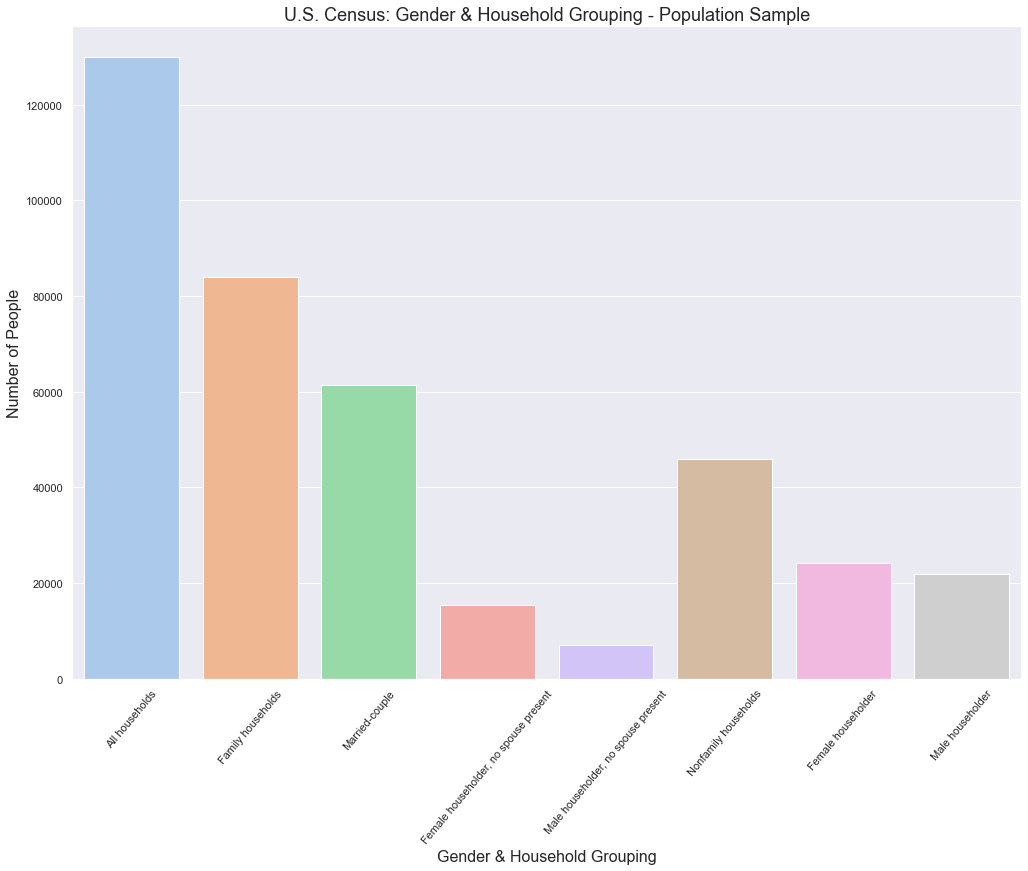

In [20]:
## Create a bar chart.
## Population.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Characteristic", y="Number (people)", data=gender_household, ci=None)
plt.title('U.S. Census: Gender & Household Grouping - Population Sample',fontsize=18)
plt.xlabel('Gender & Household Grouping', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(rotation=50)
plt.show()

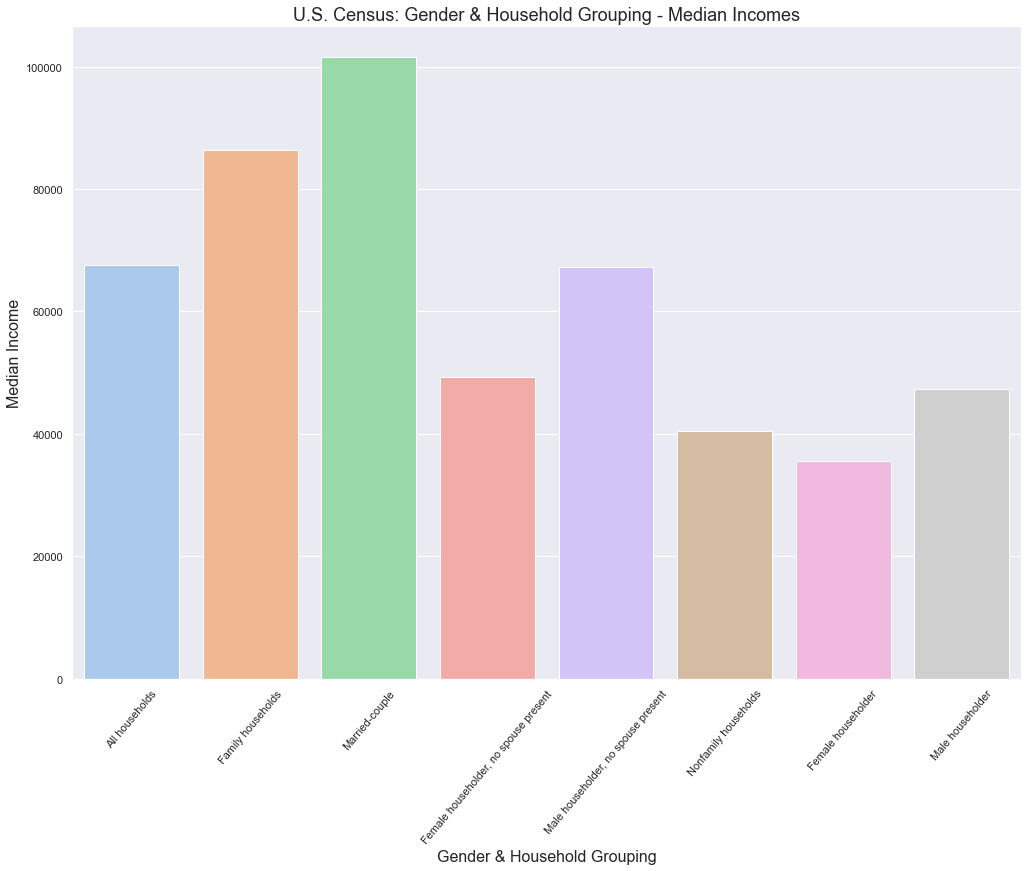

In [21]:
## Create a bar chart.
## Income.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
sns.barplot(x="Characteristic", y="Median Income", data=gender_household, ci=None)
plt.title('U.S. Census: Gender & Household Grouping - Median Incomes',fontsize=18)
plt.xlabel('Gender & Household Grouping', fontsize=16)
plt.ylabel('Median Income', fontsize=16)
plt.xticks(rotation=50)
plt.show()

From this, we can ascertain the following:
* Married couples were a smaller subset of this data, but overall had the greatest median income.
    * This makes sense, given that married households often have two people bringing in income.
* There are more female householders with no spouse present in the data, but they make quite a bit less than men householders with no spouse, from a median income standpoint.
* Additionally, female householders make up more of the dataset than male householders, yet still make less median income-wise than their male householder counterparts.
* Overall, female headed and non-family householders made the least median income, whereas households with more than one person present made the most median income.

##### Race & Etnicity Distributions

I also want to assess race distributions - both for sample numbers as well as median income.

In [22]:
race_ethnicity

Characteristic  Number (people)  Median Income
9   White, not Hispanic            85336          74912
10                Black            17358          45870
11                Asian             6987          94903
12  Hispanic (any race)            18349          55321

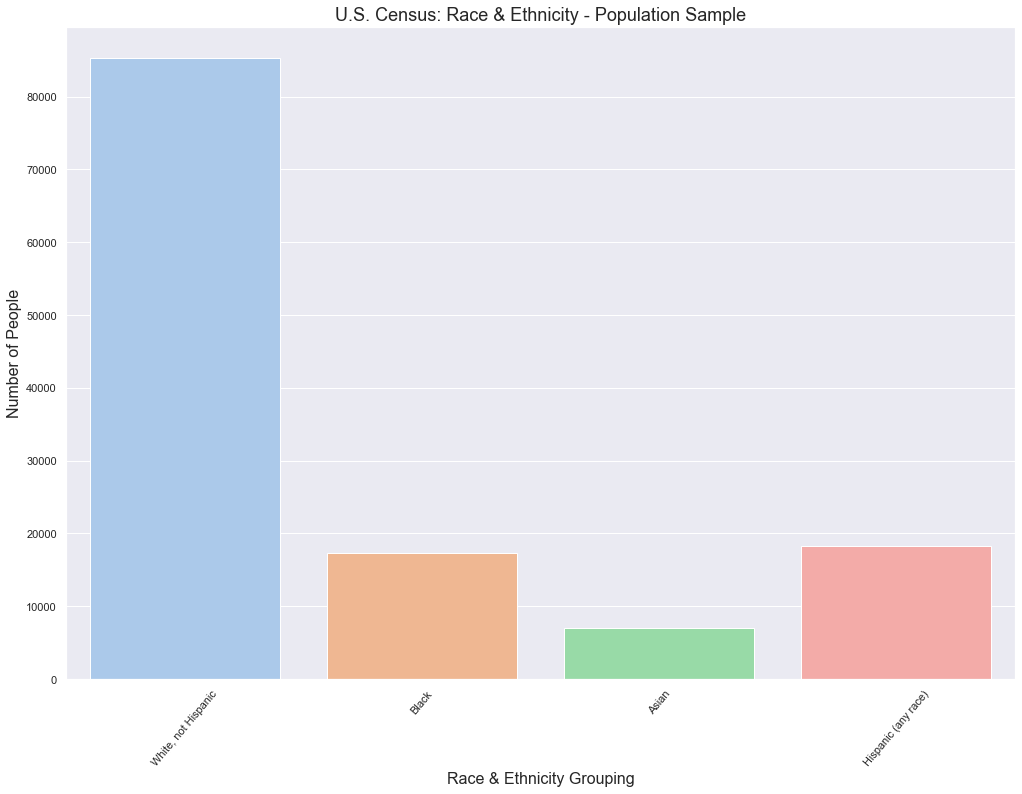

In [23]:
## Create a bar chart.
## Population.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Characteristic", y="Number (people)", data=race_ethnicity, ci=None)
plt.title('U.S. Census: Race & Ethnicity - Population Sample',fontsize=18)
plt.xlabel('Race & Ethnicity Grouping', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(rotation=50)
plt.show()

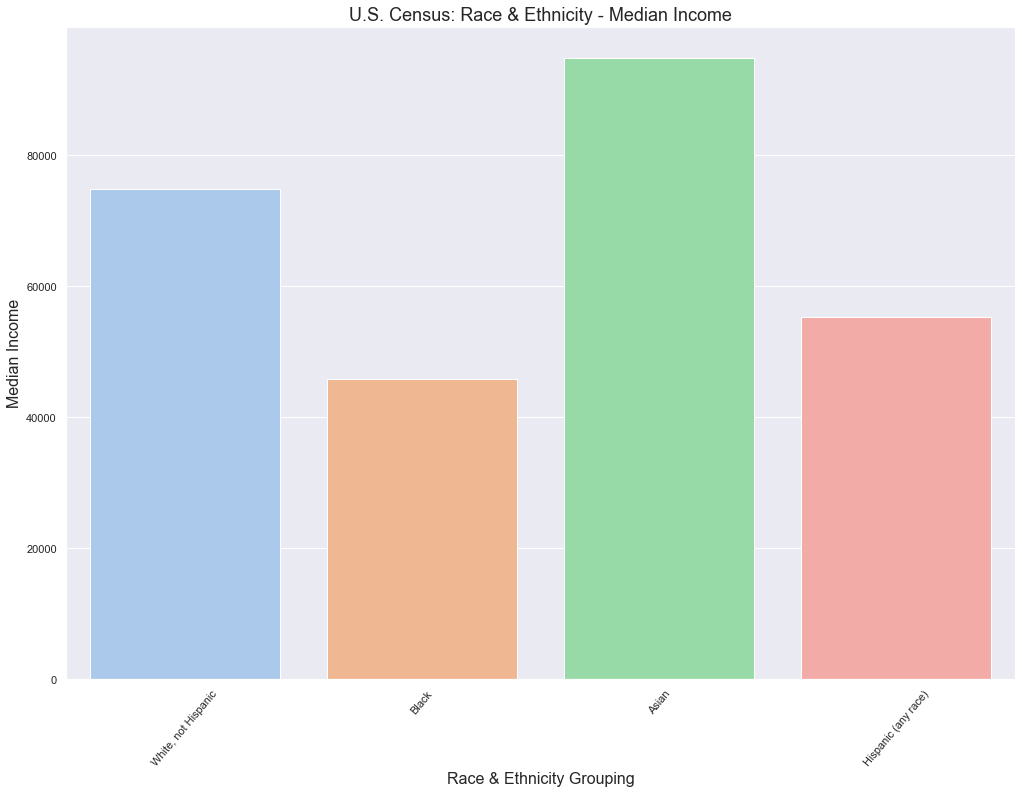

In [24]:
## Create a bar chart.
## Income.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
sns.barplot(x="Characteristic", y="Median Income", data=race_ethnicity, ci=None)
plt.title('U.S. Census: Race & Ethnicity - Median Income',fontsize=18)
plt.xlabel('Race & Ethnicity Grouping', fontsize=16)
plt.ylabel('Median Income', fontsize=16)
plt.xticks(rotation=50)
plt.show()

From this, we can ascertain the following:
* Non-Hispanic white individuals make up the majority of the dataset, but do not make the most median income overall.
* Asian individuals make up the smallest portion of this sample population, however they make the greatest median income overall. 
* Black individuals also make up a small portion of the dataset, and they also make the least median income overall.
* Slightly more of the dataset is made up of Hispanic individuals of any race, and they make only slightly more median income overall than blacks do.


##### Age Distributions

I also want to assess age distributions - both for sample numbers as well as median income.

In [25]:
age

Characteristic  Number (people)  Median Income
14      15 to 24 years             5485          46886
15      25 to 34 years            20654          71566
16      35 to 44 years            22105          85694
17      45 to 54 years            21663          90359
18      55 to 64 years            24336          74270
19  65 years and older            35688          46360

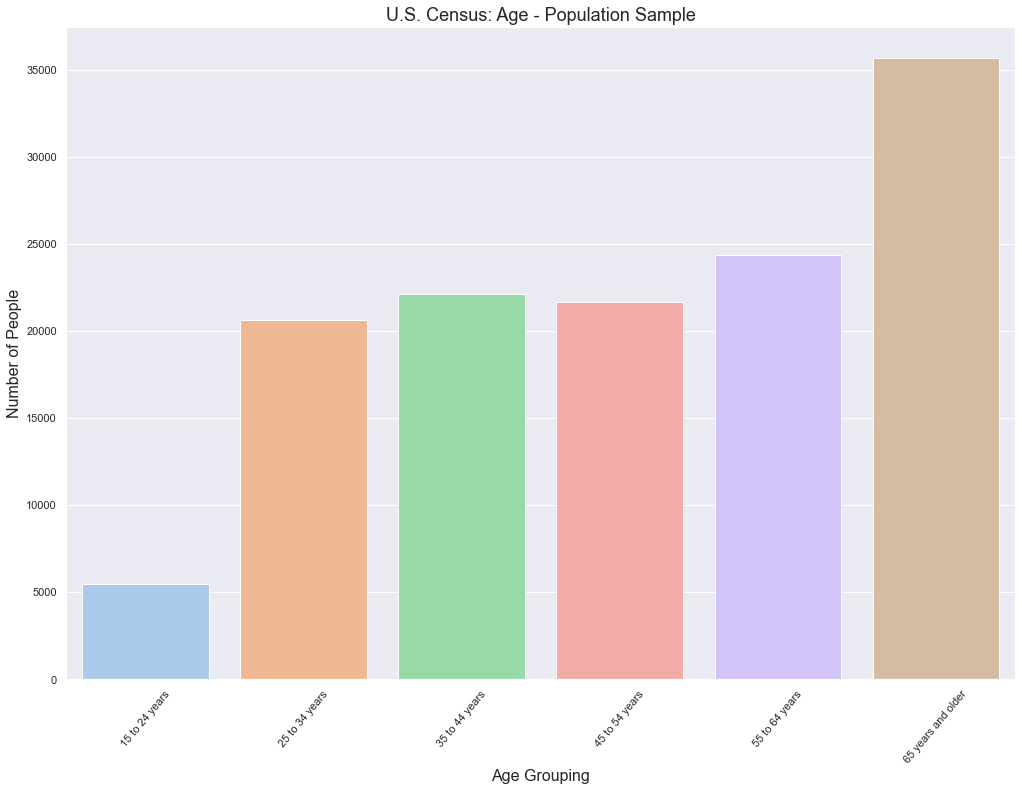

In [26]:
## Create a bar chart.
## Population.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Characteristic", y="Number (people)", data=age, ci=None)
plt.title('U.S. Census: Age - Population Sample',fontsize=18)
plt.xlabel('Age Grouping', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(rotation=50)
plt.show()

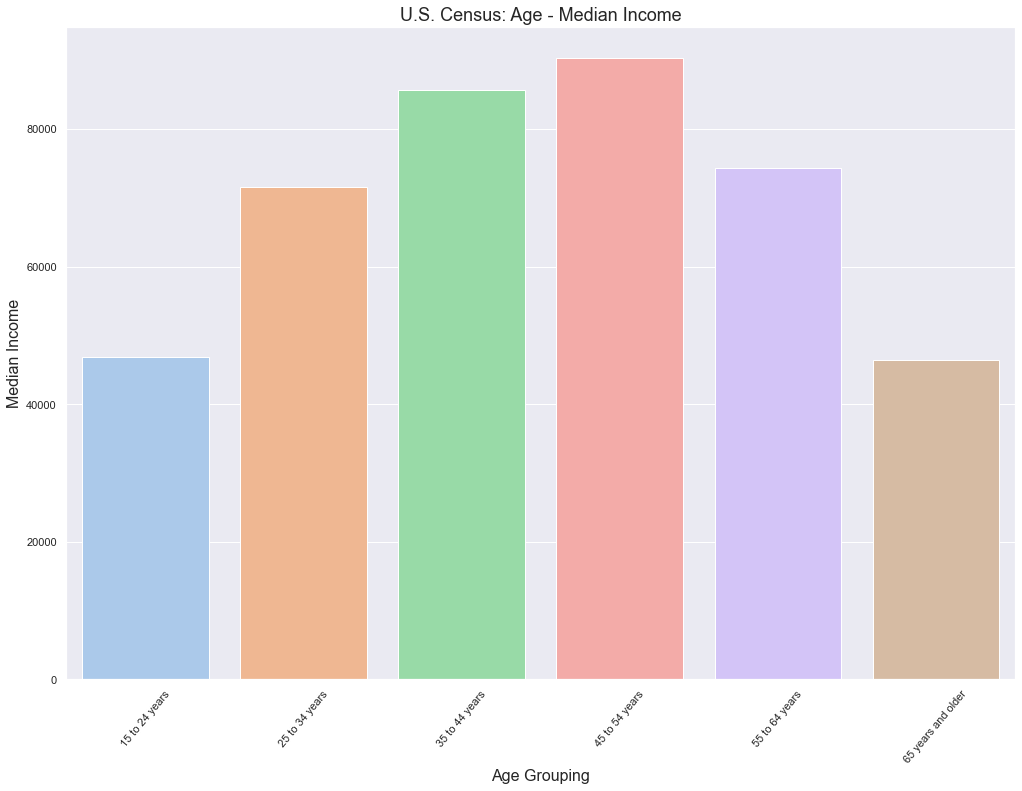

In [27]:
## Create a bar chart.
## Income.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
sns.barplot(x="Characteristic", y="Median Income", data=age, ci=None)
plt.title('U.S. Census: Age - Median Income',fontsize=18)
plt.xlabel('Age Grouping', fontsize=16)
plt.ylabel('Median Income', fontsize=16)
plt.xticks(rotation=50)
plt.show()

From this, we can ascertain the following:
* The majority of the age cohort is comprised of those 65 years and older. However, these people make the least overall median income from the dataset (in line with those in the 15-24 age cohort).
* 15-24 year olds comprise the least amount of people in this dataset, and also garner the least overall median income (in line with those 65 and older).
* Those in the 45-54 age category make the most overall median income.
    * This is likely when someone is at the "peak" of their career. (It is important to note that this could be different for different people within this category).

##### Education Distributions

I also want to assess education distributions - both for sample numbers as well as median income.

In [28]:
education

Characteristic  Number (people)  Median Income
34      High school, no college            31647          47405
35                 Some college            33646          63653
36  Bachelor's degree or higher            49102         106936

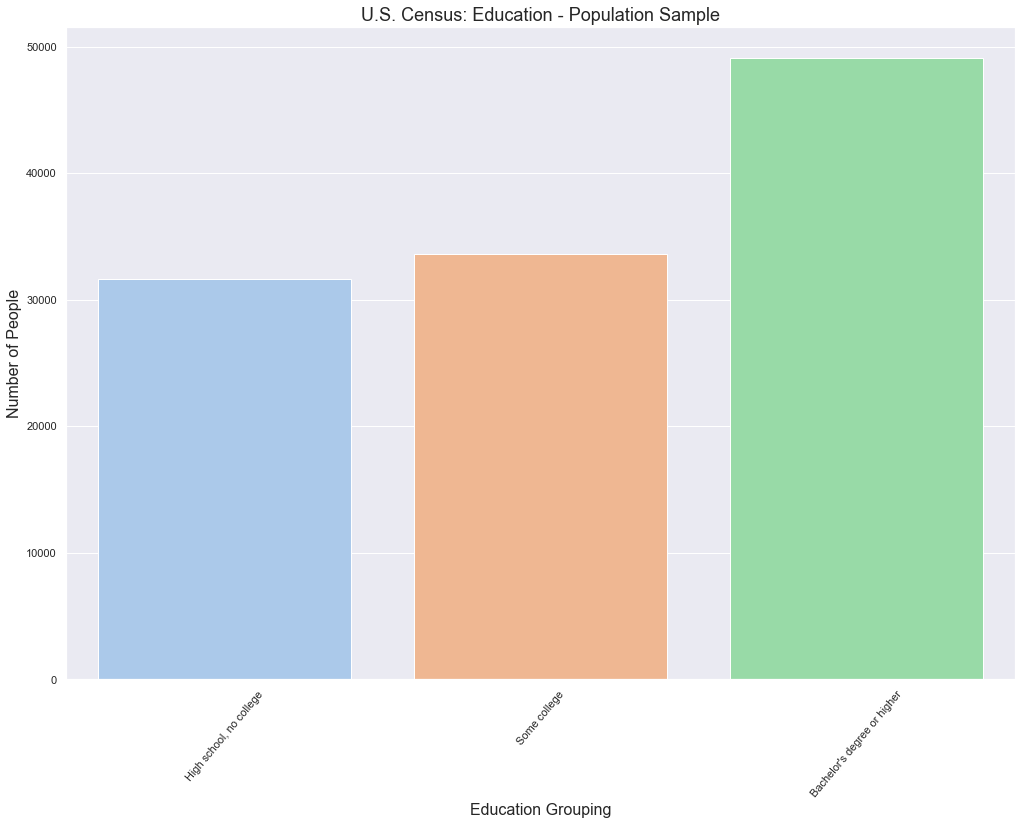

In [29]:
## Create a bar chart.
## Population.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Characteristic", y="Number (people)", data=education, ci=None)
plt.title('U.S. Census: Education - Population Sample',fontsize=18)
plt.xlabel('Education Grouping', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(rotation=50)
plt.show()

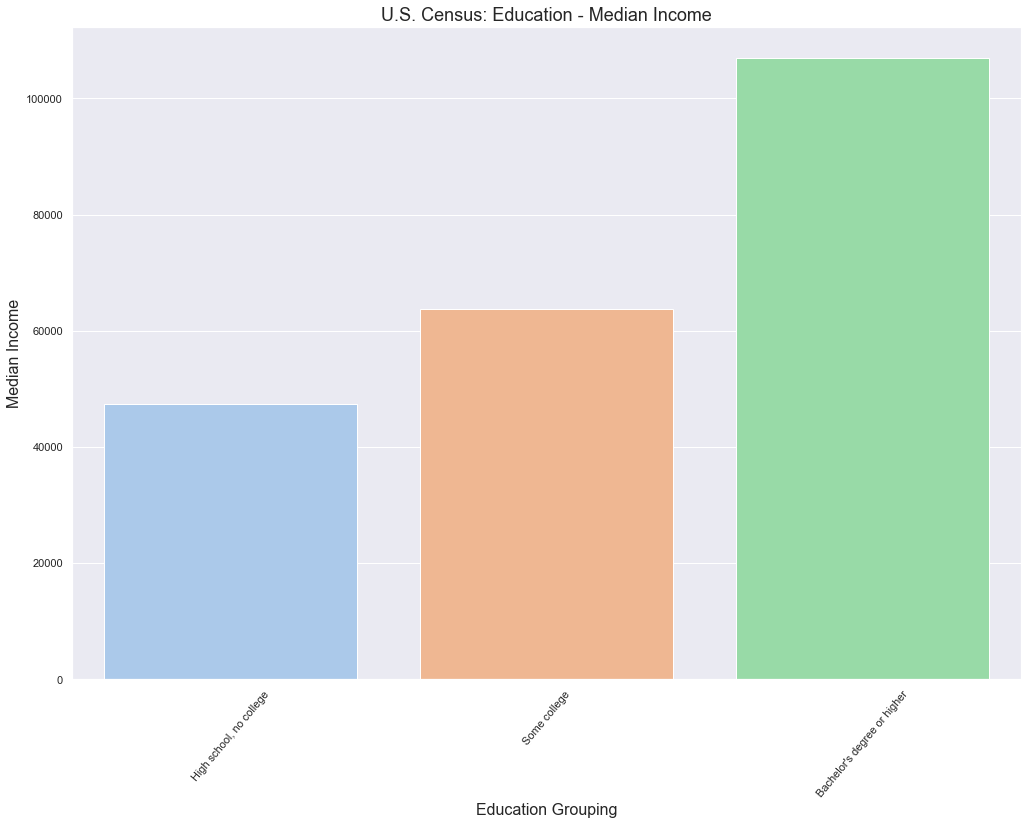

In [30]:
## Create a bar chart.
## Income.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
sns.barplot(x="Characteristic", y="Median Income", data=education, ci=None)
plt.title('U.S. Census: Education - Median Income',fontsize=18)
plt.xlabel('Education Grouping', fontsize=16)
plt.ylabel('Median Income', fontsize=16)
plt.xticks(rotation=50)
plt.show()

From this, we can ascertain the following:
* For these visualizations, the population as well as the median income earnings tend to be the most in line, out of all of the graphs.
* The fewest represented are those with only a HS degree and no college - they also make the leat median income overall.
* The most represented are those with a BS degree or higher - they also make the most median income overall.

Overall, from these bar chart analyses and distributions, the following should be considered:

* It is important to note that these groups are not mutually exclusive. For example, there could be a person who is part of a married household but is also considered the female householder. As another example, a female householder present within the data could be a non-white Hispanic. Etc.
    * In this same vein, it is important to note that even though a certain cohort may show a median picture for that cohort, there are sub-cohorts that make up that cohort that may experience a difference. For example, you could have a black woman with a BS degree who earns less than some of her counterparts.
* It is important to ask questions about survey response relative to culture, access, literacy, etc. 
    * Are certain groups of people more likely to fill out the Census survey?
    * Are there groups of people who do not have adequate resources to complete the survey, or who are not familiar with how to do so?
    * Culturally, are certain people more inclined or not inclined to complete the survey?

As a next step, I would like to see the relationships, correlations, and the significance of these.

##### Assessing Relationships and Correlations

##### Gender and Household:

In [31]:
gender_household.dtypes

Characteristic     object
Number (people)     int64
Median Income       int64
dtype: object

In [32]:
gender_household.describe()

Number (people)  Median Income
count         8.000000       8.000000
mean      48724.250000   61903.125000
std       41705.495978   23167.212364
min        6963.000000   35574.000000
25%       20208.250000   45560.250000
50%       35134.000000   58259.000000
75%       67067.250000   72233.750000
max      129931.000000  101517.000000

In [33]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dodgers_df dataframe.

gender_household_dum = pd.get_dummies(gender_household, columns=['Characteristic'])
gender_household_dum.head()

Number (people)  Median Income  Characteristic_All households  \
0           129931          67521                              1   
1            83907          86372                              0   
2            61454         101517                              0   
3            15490          49214                              0   
4             6963          67304                              0   

   Characteristic_Family households  Characteristic_Female householder  \
0                                 0                                  0   
1                                 1                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   Characteristic_Female householder, no spouse present  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   Characteristic_Male householder  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Characteristic_Male householder, no spouse present  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Characteristic_Married-couple  Characteristic_Nonfamily households  
0                              0                                    0  
1                              0                                    0  
2                              1                                    0  
3                              0                                    0  
4                              0                                    0

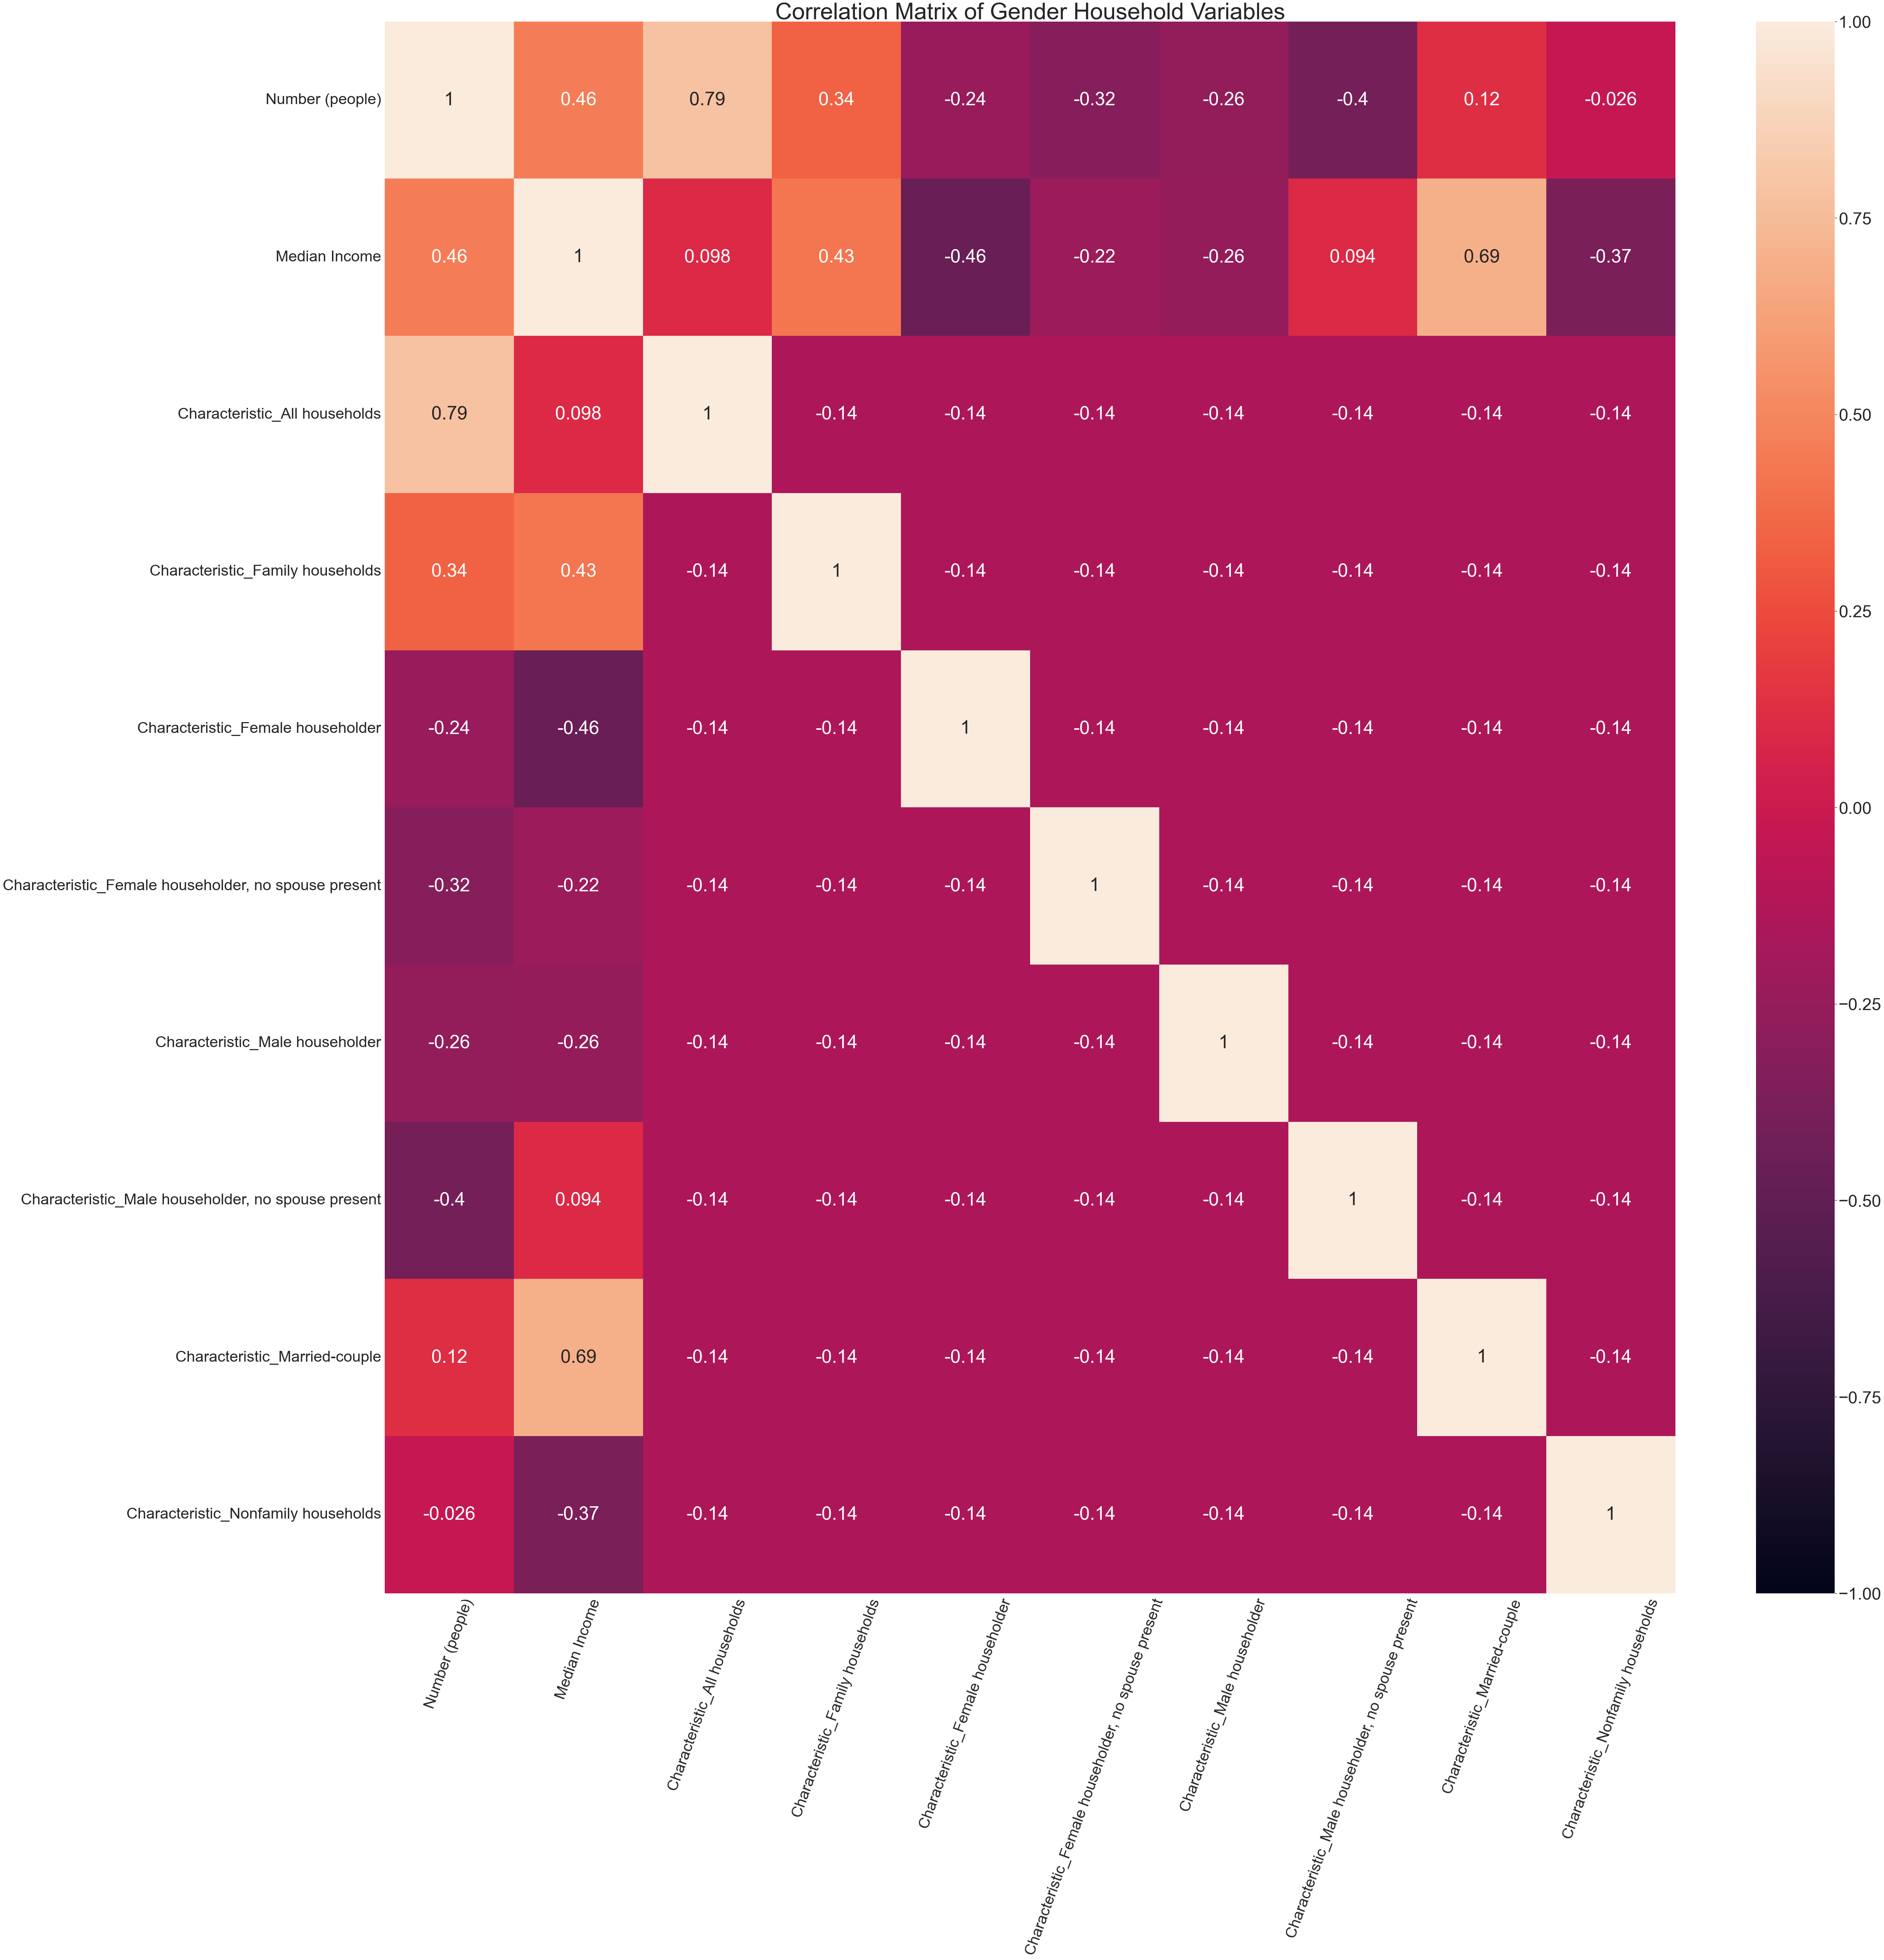

In [34]:
## Plot a seaborn correlation heatmap.

sns.set(font_scale=4.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
sns.heatmap(gender_household_dum.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Matrix of Gender Household Variables', fontdict={'fontsize':60})
plt.yticks(fontsize = 40, rotation = 0)
plt.xticks(fontsize = 40, rotation = 70)
plt.show()

From this, we can ascertain the following with respect to income earnings:
* A moderately strong, positive correlation exists between the number of people in a category and the median income earned (0.46) (makes sense - with more people is more money added to the "pool" of money from which the median in determined).
* A somewhat strong, positive correlation exists between being a married couple and your median income (0.69), which we could see from the EDA bar chart of this variable.
* A moderately strong, positive correlation exists between the variables of median income and family households (0.43).
* A moderately strong, negative correlation exists between the variables of median income and being a female householder - this makes sense given our bar chart EDA; as one variable increases (being a female householder) the likelihood of the other decreases (median income) (-0.46).

##### Race and Ethnicity:

In [35]:
race_ethnicity.dtypes

Characteristic     object
Number (people)     int64
Median Income       int64
dtype: object

In [36]:
race_ethnicity.describe()

Number (people)  Median Income
count         4.000000       4.000000
mean      32007.500000   67751.500000
std       35921.752022   21769.964668
min        6987.000000   45870.000000
25%       14765.250000   52958.250000
50%       17853.500000   65116.500000
75%       35095.750000   79909.750000
max       85336.000000   94903.000000

In [37]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dataframe.

race_ethnicity_dum = pd.get_dummies(race_ethnicity, columns=['Characteristic'])
race_ethnicity_dum.head()

Number (people)  Median Income  Characteristic_Asian  \
9             85336          74912                     0   
10            17358          45870                     0   
11             6987          94903                     1   
12            18349          55321                     0   

    Characteristic_Black  Characteristic_Hispanic (any race)  \
9                      0                                   0   
10                     1                                   0   
11                     0                                   0   
12                     0                                   1   

    Characteristic_White, not Hispanic  
9                                    1  
10                                   0  
11                                   0  
12                                   0

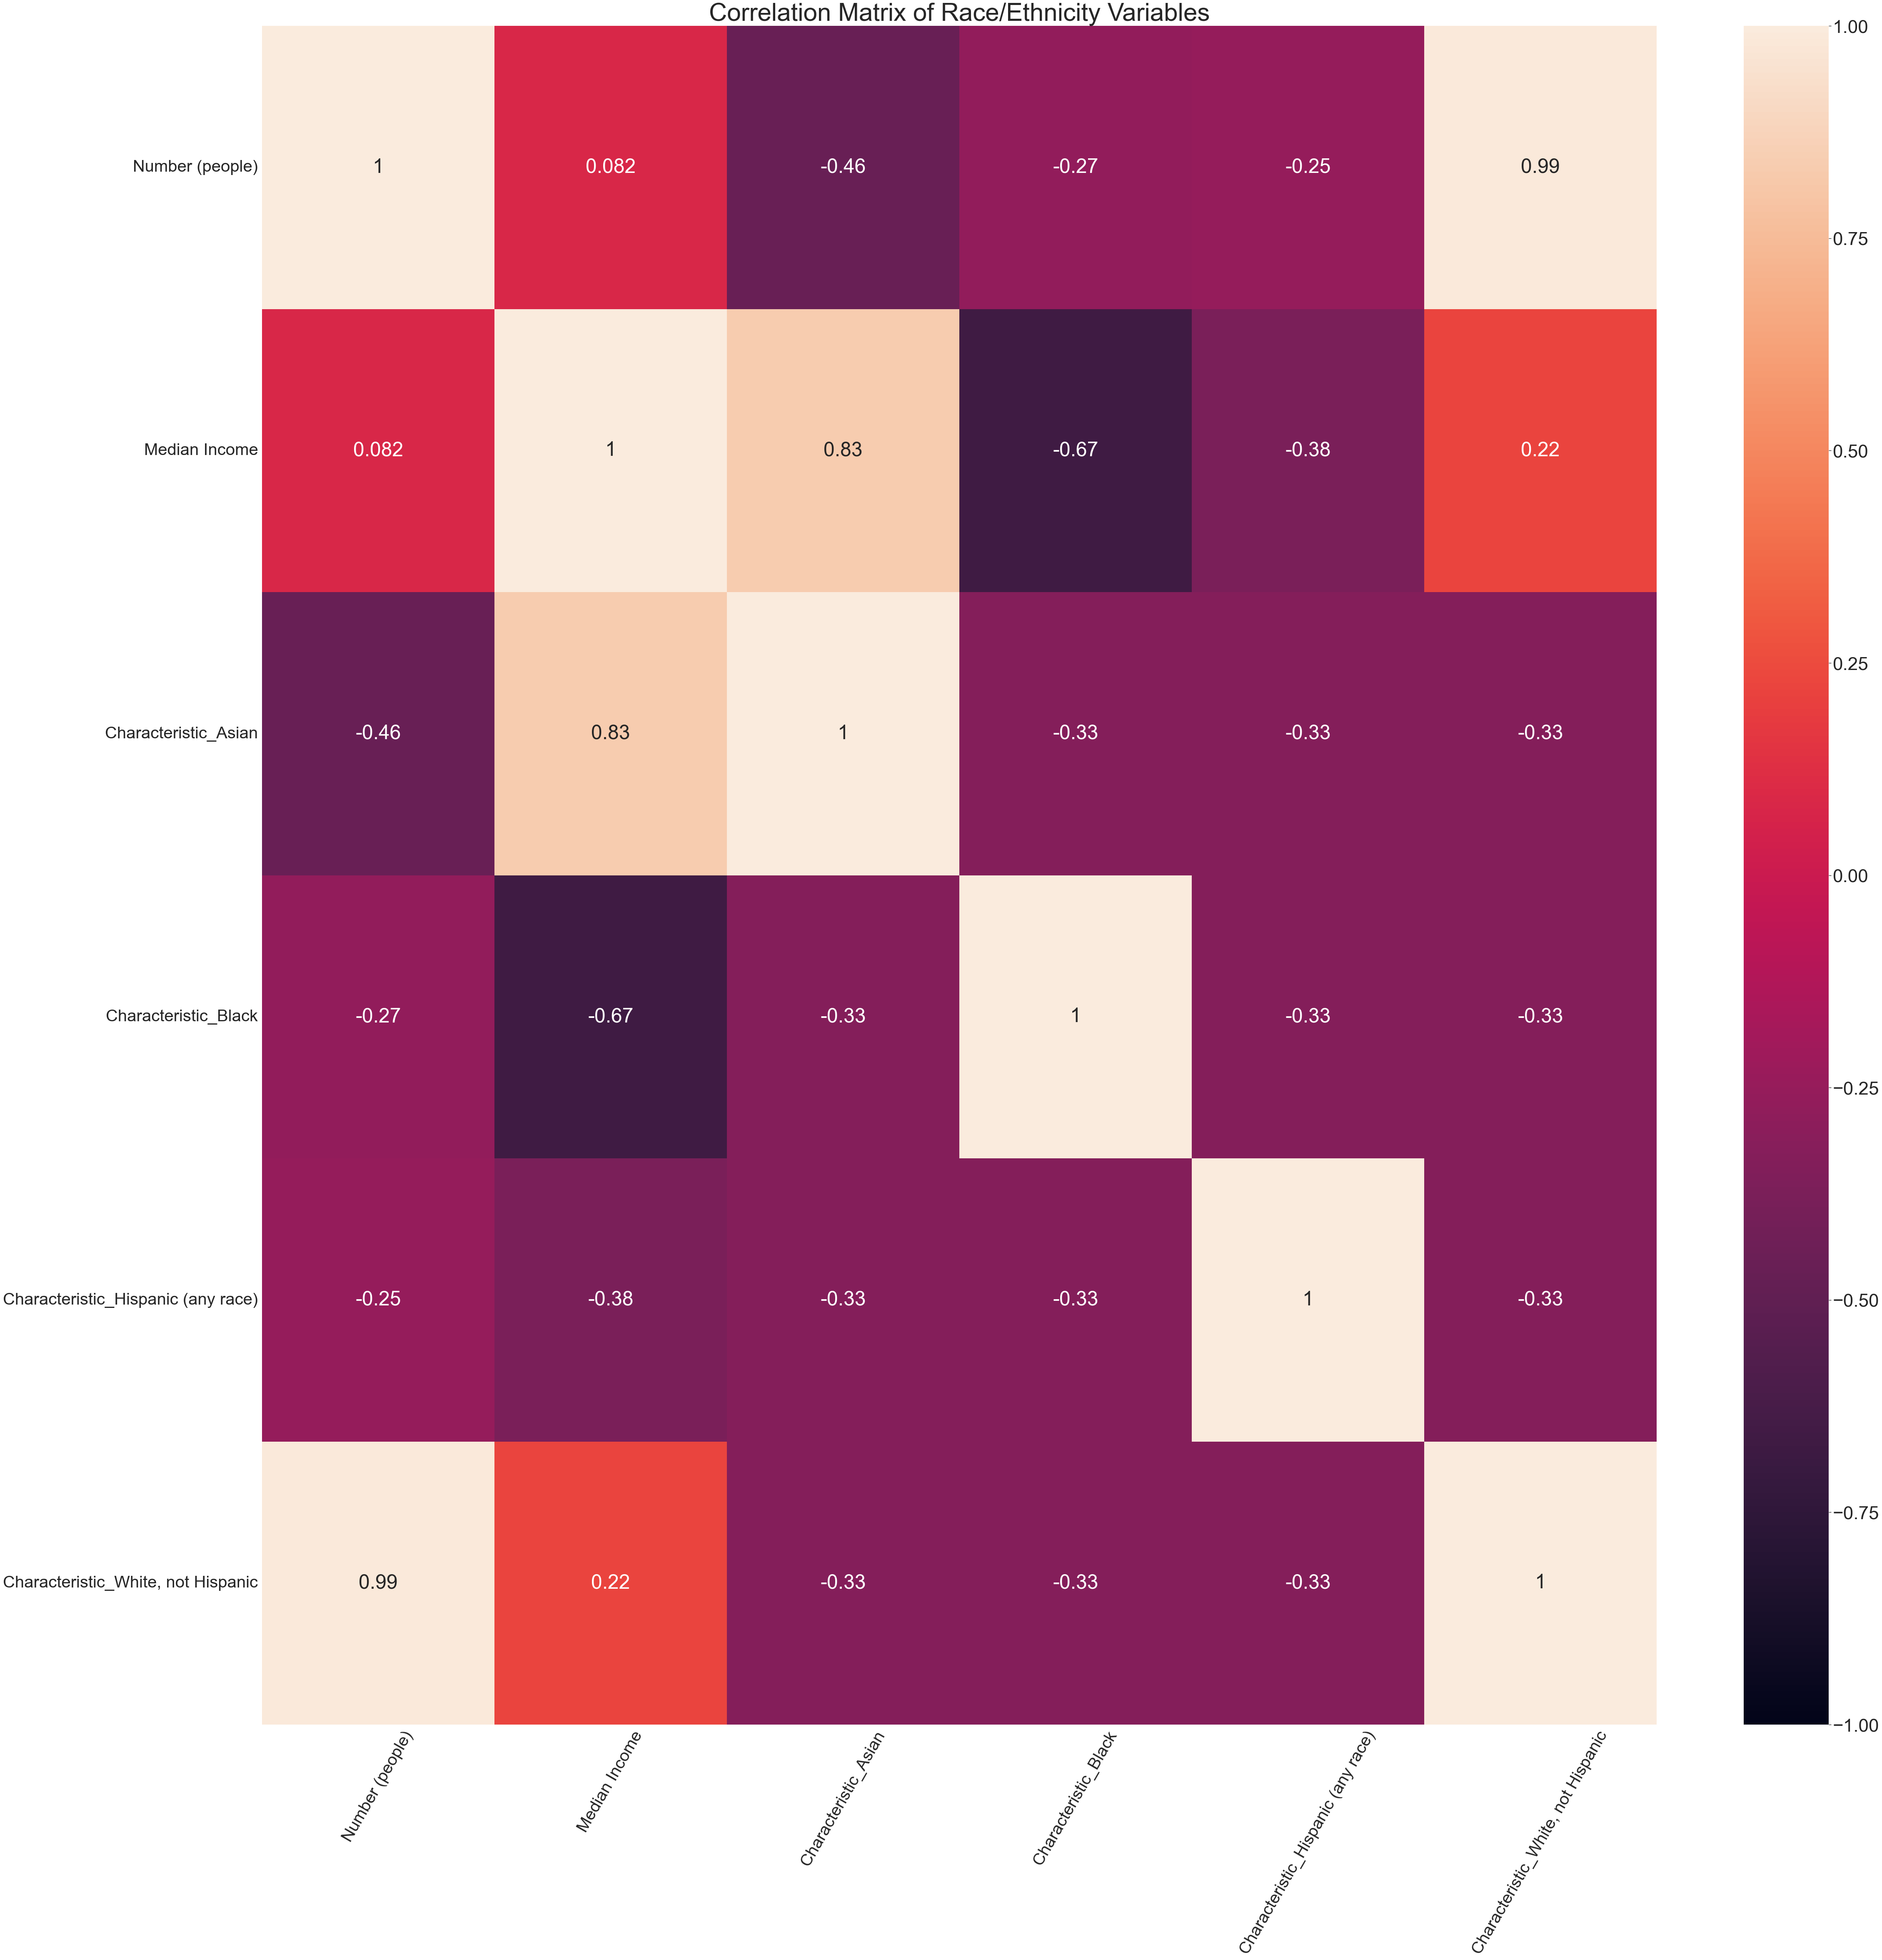

In [38]:
## Plot a seaborn correlation heatmap.

sns.set(font_scale=4.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
sns.heatmap(race_ethnicity_dum.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Matrix of Race/Ethnicity Variables', fontdict={'fontsize':60}, pad=12)
plt.yticks(fontsize = 40, rotation = 0)
plt.xticks(fontsize = 40, rotation = 60)
plt.show()

From this, we can ascertain the following with respect to income earnings:
* A strong, positive correlation exists between being Asian and the median income earned (0.83) This makes sense, given what we saw in our EDA bar chart. 
* A strong, negative correlation exists between being black and your median income (-0.67), which we could also see from the EDA bar chart of this variable.

##### Age:

In [39]:
age.dtypes

Characteristic     object
Number (people)     int64
Median Income       int64
dtype: object

In [40]:
age.describe()

Number (people)  Median Income
count         6.000000       6.000000
mean      21655.166667   69189.166667
std        9662.156228   18818.276567
min        5485.000000   46360.000000
25%       20906.250000   53056.000000
50%       21884.000000   72918.000000
75%       23778.250000   82838.000000
max       35688.000000   90359.000000

In [41]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dataframe.

age_dum = pd.get_dummies(age, columns=['Characteristic'])
age_dum.head()

Number (people)  Median Income  Characteristic_15 to 24 years  \
14             5485          46886                              1   
15            20654          71566                              0   
16            22105          85694                              0   
17            21663          90359                              0   
18            24336          74270                              0   

    Characteristic_25 to 34 years  Characteristic_35 to 44 years  \
14                              0                              0   
15                              1                              0   
16                              0                              1   
17                              0                              0   
18                              0                              0   

    Characteristic_45 to 54 years  Characteristic_55 to 64 years  \
14                              0                              0   
15                              0                              0   
16                              0                              0   
17                              1                              0   
18                              0                              1   

    Characteristic_65 years and older  
14                                  0  
15                                  0  
16                                  0  
17                                  0  
18                                  0

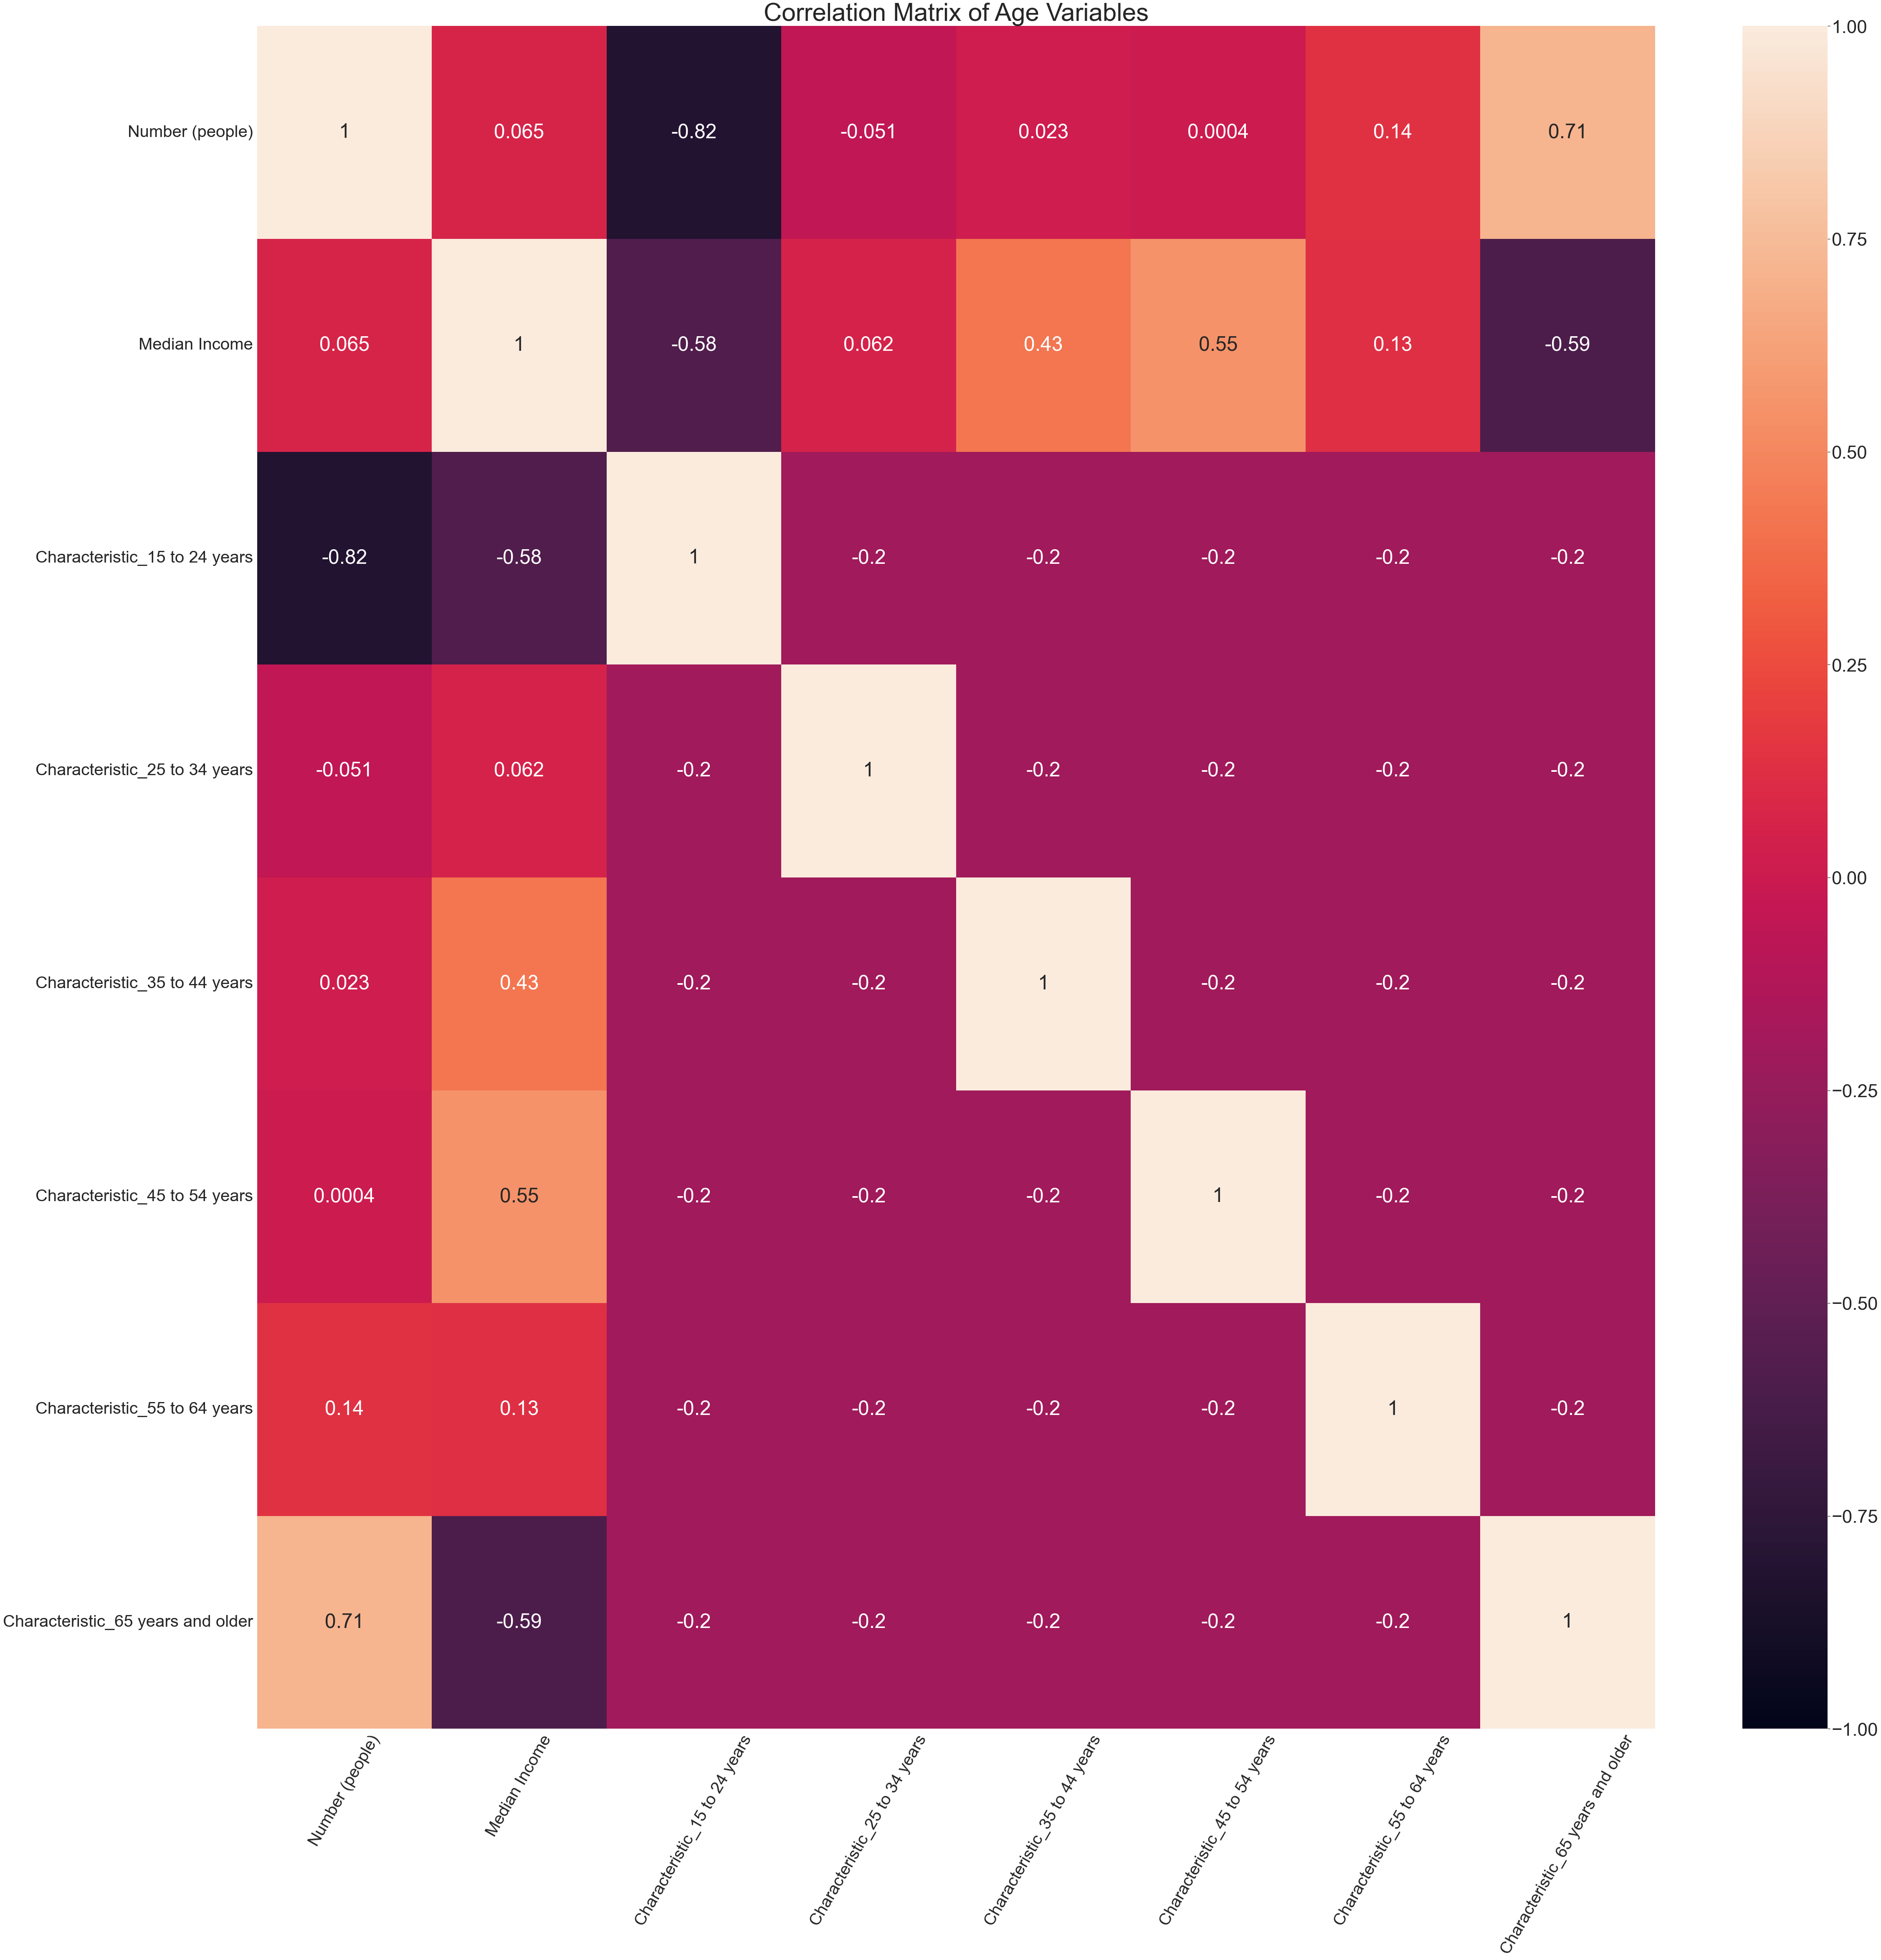

In [42]:
## Plot a seaborn correlation heatmap.

sns.set(font_scale=4.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
sns.heatmap(age_dum.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Matrix of Age Variables', fontdict={'fontsize':60}, pad=12)
plt.yticks(fontsize = 40, rotation = 0)
plt.xticks(fontsize = 40, rotation = 60)
plt.show()

From this, we can ascertain the following with respect to income earnings:
* Strong, negative correlations exist between median income and the 15-24 age cohort (-0.57), as well as between median income and the 65 years and older cohort (-0.59). This makes sense, given our EDA of these variables. It appears that overall, young people and elderly people tend to make less.
* Moderately strong, positive correlations exist between the variables of median income and the 35-44 cohort (0.43) as well as the 45-54 cohort (0.55).

##### Education:

In [43]:
education.dtypes

Characteristic     object
Number (people)     int64
Median Income       int64
dtype: object

In [44]:
education.describe()

Number (people)  Median Income
count         3.000000       3.000000
mean      38131.666667   72664.666667
std        9553.018389   30771.619917
min       31647.000000   47405.000000
25%       32646.500000   55529.000000
50%       33646.000000   63653.000000
75%       41374.000000   85294.500000
max       49102.000000  106936.000000

In [45]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dataframe.

edu_dum = pd.get_dummies(education, columns=['Characteristic'])
edu_dum.head()

Number (people)  Median Income  \
34            31647          47405   
35            33646          63653   
36            49102         106936   

    Characteristic_Bachelor's degree or higher  \
34                                           0   
35                                           0   
36                                           1   

    Characteristic_High school, no college  Characteristic_Some college  
34                                       1                            0  
35                                       0                            1  
36                                       0                            0

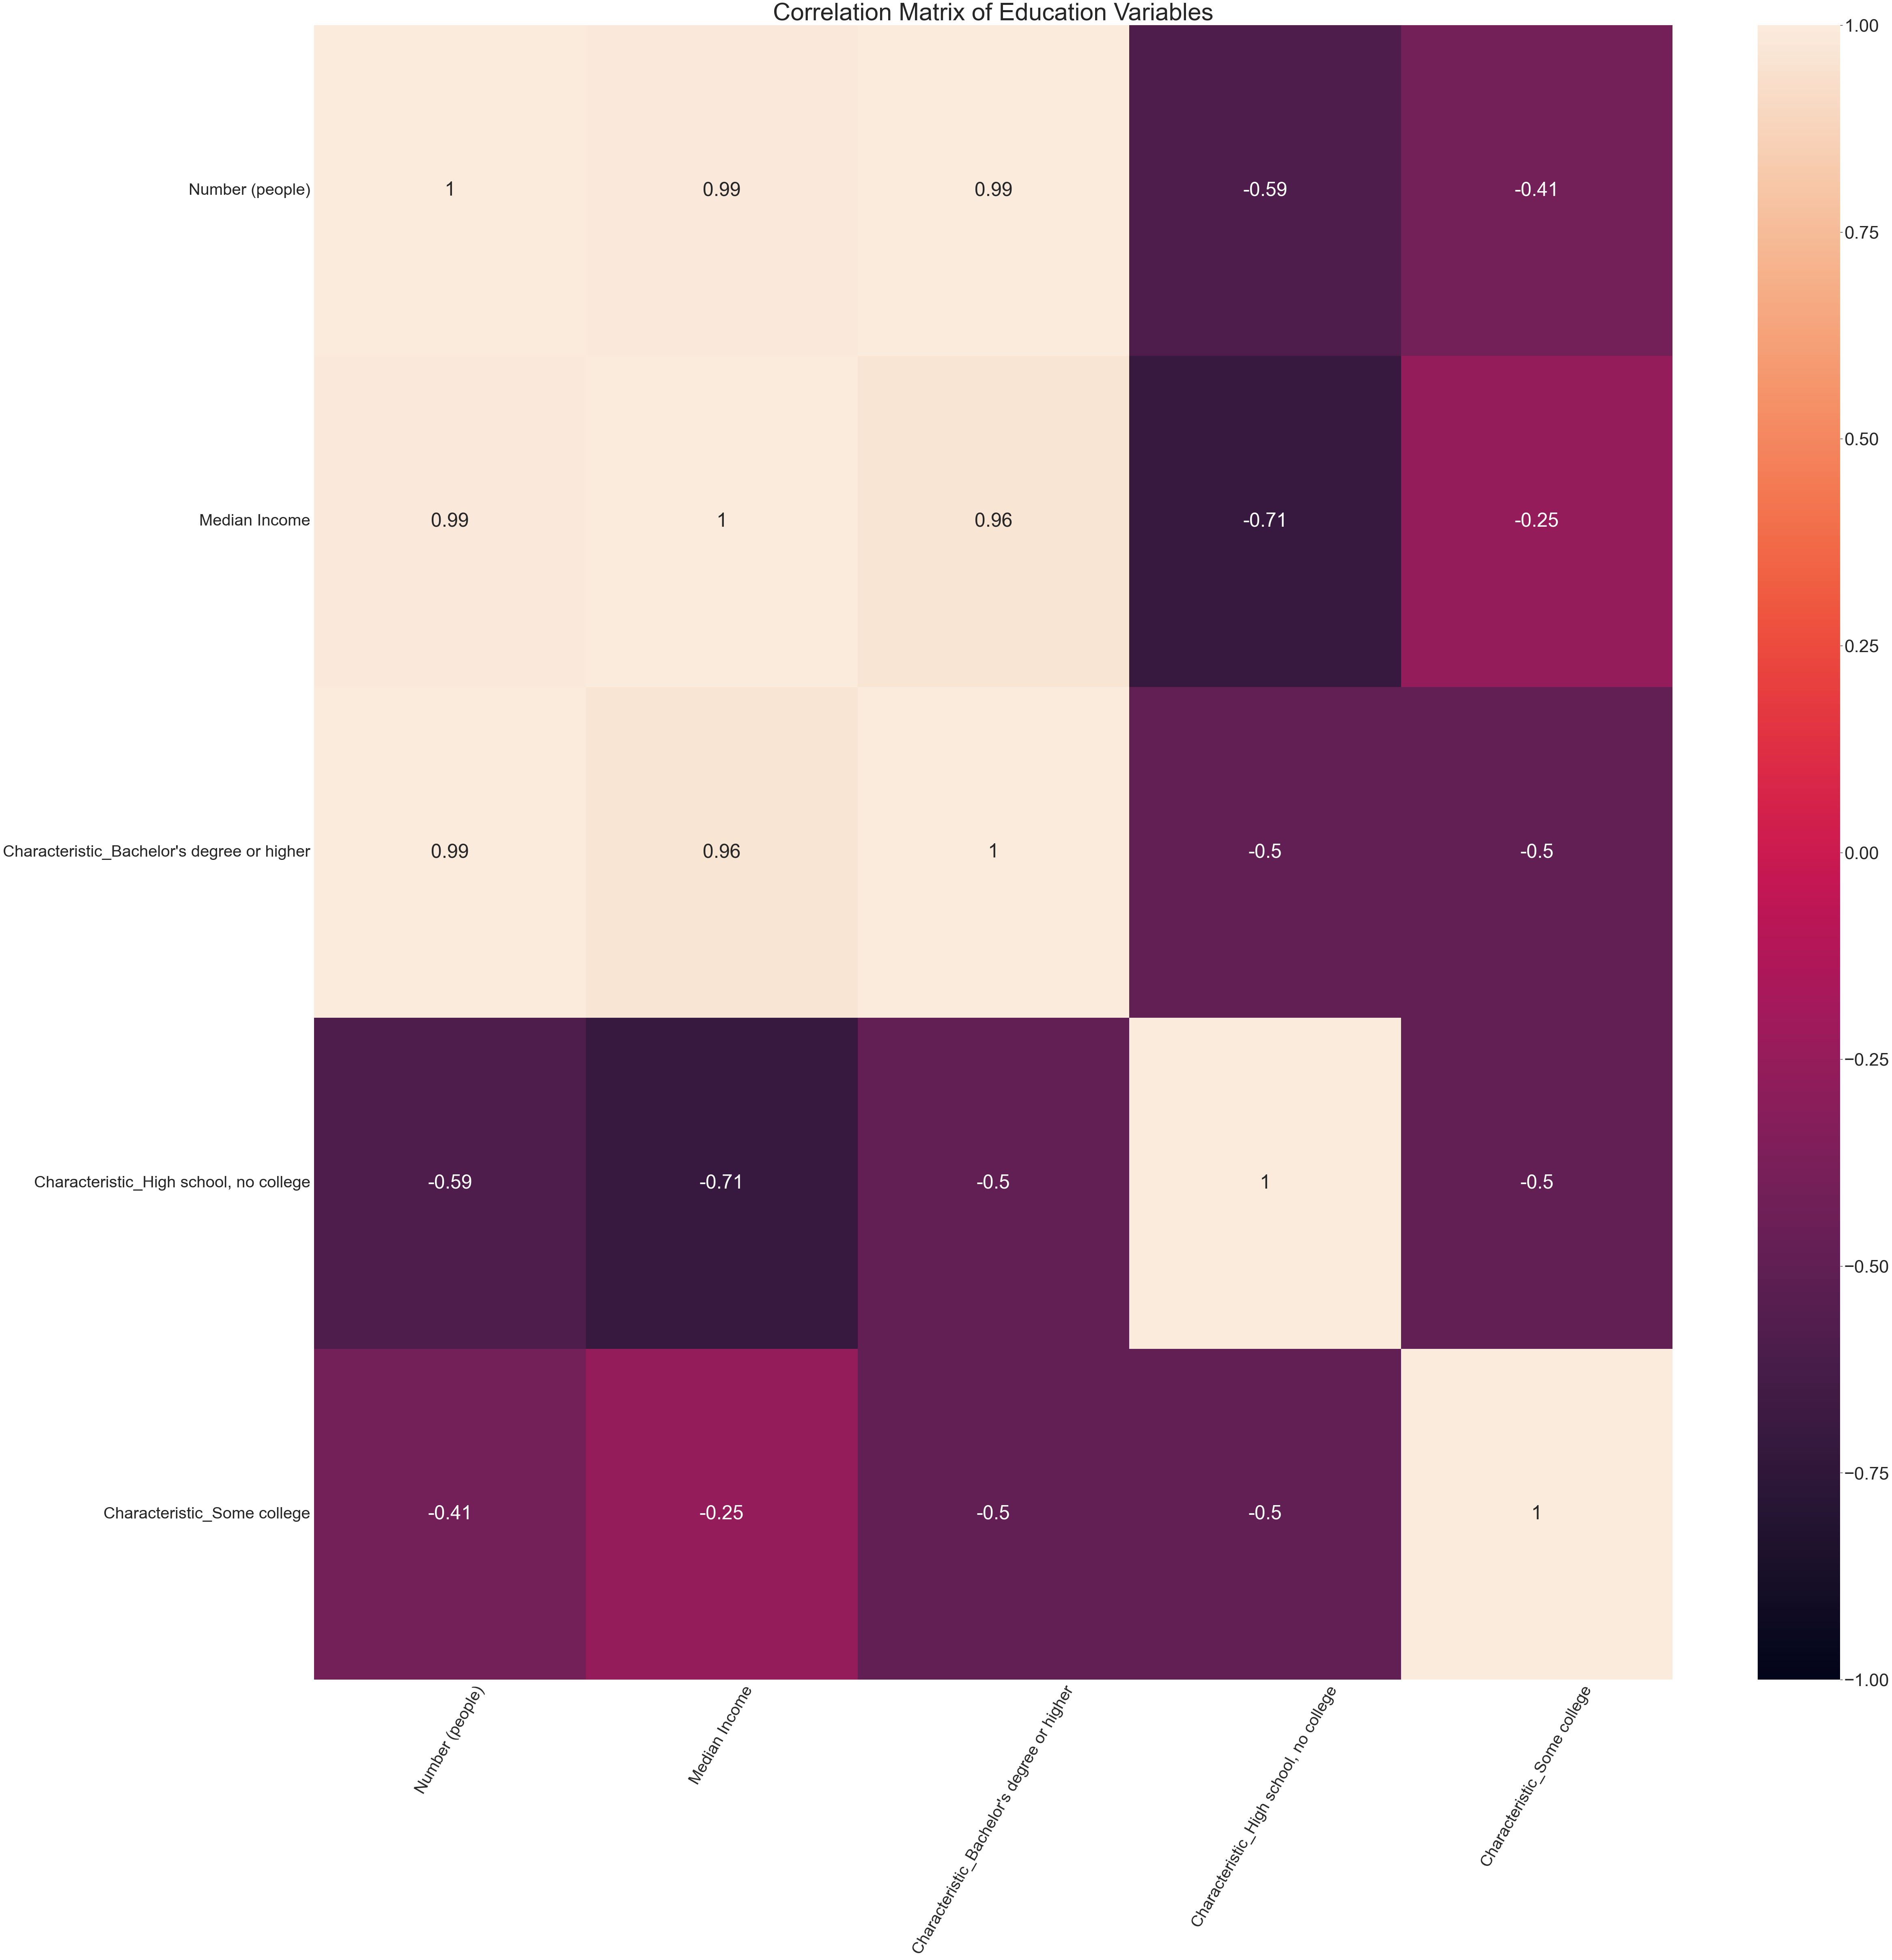

In [46]:
## Plot a seaborn correlation heatmap.

sns.set(font_scale=4.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
sns.heatmap(edu_dum.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Matrix of Education Variables', fontdict={'fontsize':60}, pad=12)
plt.yticks(fontsize = 40, rotation = 0)
plt.xticks(fontsize = 40, rotation = 60)
plt.show()

From this, we can ascertain the following with respect to income earnings:
* A strong, negative correlation exists between median income and those with only a HS degree (-0.71). This was also deduced based upon the EDA bar chart.
* A strong, positive correlation exists between the variables of median income and having a BS degree or higher (0.96). We could ascertain this from the bar chart EDA.

Overall, the findings from the correlation heatmaps with these variables are indicative and reflective of the EDA histogram and bar chart findings - they affirm what I explored earlier.

##### Data Professional Survey Data

In [76]:
## View the data again.

data_income_cln_df.head(10)

SalaryUSD        Country  \
0     115000  United States   
1     100000  United States   
2     100000          Spain   
3      70000  United States   
4     110000  United States   
5      79500  United States   
6     110000  United States   
7      39000       Portugal   
8      58000  United States   
9     125000  United States   

                                            JobTitle ManageStaff  \
0  DBA (Production Focus - build & troubleshoot s...          No   
1                  Developer: App code (C#, JS, etc)          No   
2                                              Other         Yes   
3                                            Analyst          No   
4  DBA (General - splits time evenly between writ...          No   
5                                            Analyst          No   
6  DBA (General - splits time evenly between writ...          No   
7                  Developer: App code (C#, JS, etc)         Yes   
8  Developer: Business Intelligence (SSRS, PowerB...          No   
9                                           Engineer          No   

   YearsWithThisTypeOfJob PopulationOfLargestCityWithin20Miles  \
0                       5                 20K-99K (large town)   
1                       6                     1M+ (metropolis)   
2                       3                     1M+ (metropolis)   
3                       3                     1M+ (metropolis)   
4                      25                     100K-299K (city)   
5                       2                     1M+ (metropolis)   
6                       4                     100K-299K (city)   
7                      15                 300K-1M (large city)   
8                       1                 300K-1M (large city)   
9                       4                     100K-299K (city)   

                        EmploymentSector Gender  
0                       Private business   Male  
1                       Private business   Male  
2                       Private business   Male  
3                       Private business   Male  
4                             Non-profit   Male  
5                       Private business   Male  
6                       Private business   Male  
7                       Private business   Male  
8  Education (K-12, college, university)   Male  
9                       Private business   Male

In [75]:
data_income_cln_df.describe()

SalaryUSD  YearsWithThisTypeOfJob
count  8.627000e+03             8627.000000
mean   9.394616e+04                7.544453
std    5.998446e+04                6.541186
min    0.000000e+00                0.000000
25%    6.500000e+04                3.000000
50%    9.000000e+04                5.000000
75%    1.150000e+05               10.000000
max    1.850000e+06               45.000000

##### Gender Distribution and Salary (in USD)

<AxesSubplot:title={'center':'2020 Data Professionals: Distribution of Data Professionals by Gender'}, xlabel='Gender', ylabel='Count'>

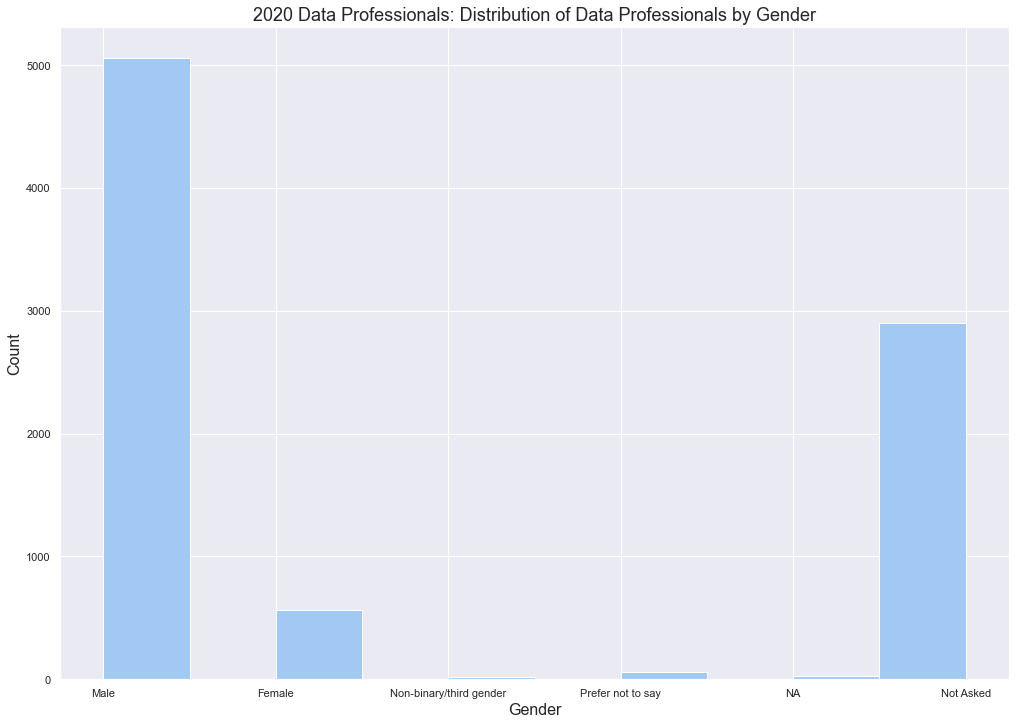

In [69]:
## Create a histogram.
## Dist of gender.
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.title('2020 Data Professionals: Distribution of Data Professionals by Gender',fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
data_income_cln_df['Gender'].hist()

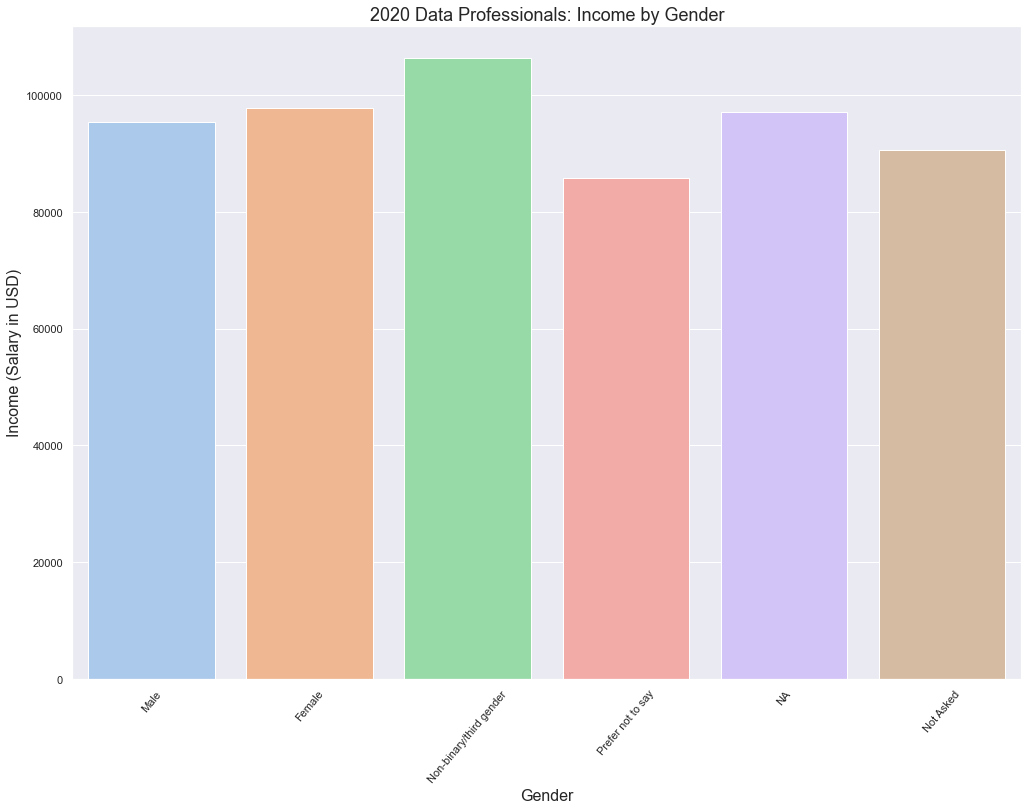

In [71]:
## Create a bar chart.
## Salary.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Gender", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('2020 Data Professionals: Income by Gender',fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(rotation=50)
plt.show()

Because the gender distribution of the dataset appears imbalanced, I want to plot a boxplot to look at potential outliers as well.

<AxesSubplot:title={'center':'2020 Data Professionals: Boxplot of Income by Gender'}, xlabel='Gender', ylabel='SalaryUSD'>

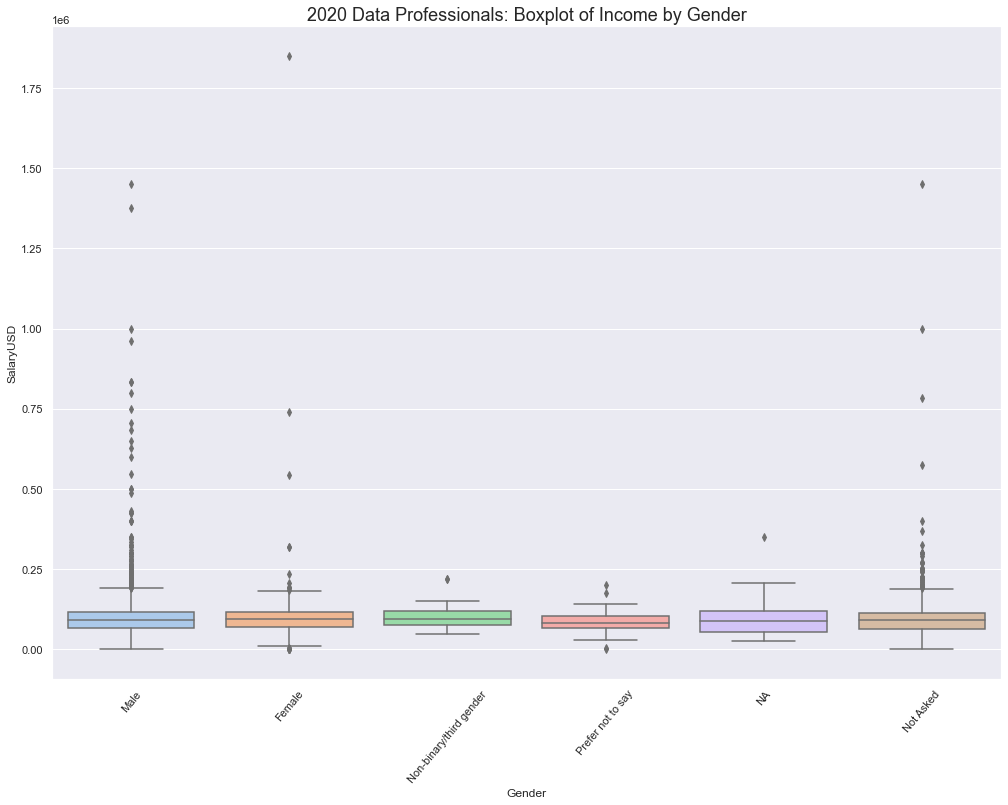

In [72]:
## Boxplot of gender to look at outliers.
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.title('2020 Data Professionals: Boxplot of Income by Gender',fontsize=18)
## fig = plt.figure(figsize = (10,8))
plt.xticks(rotation=50)
sns.boxplot(x = 'Gender', y = 'SalaryUSD', data = data_income_cln_df)

Overall, we can see:

* This dataset is primarily comprised of male responders relative to the other gender categories. 
* A good portion (combined) of respondents did not prefer to respond, responded with something silly (NA), or were not asked on their survey.
* A very small portion of this survey included data from female respondents as well as non-binary/third gender respondents.
* The second bar chart shows the greatest earnings concentrated in the non-binary/third gender category, but this is likely due to skew, given how few respondents existed within that category of the population.
* Additionally, from the second bar chart, it appears that females made more than their male counterparts, despite making up a small portion of the survey sample, but again, this could be related to skew.
* Quite a bit of gender information is missing from this, so it is tough to know what true gender category those respondents would fall into.
* A few outliers exist, so that will need to be taken into consideration with any assessment/conclusion.

##### Country and Salary (in USD)

<AxesSubplot:title={'center':'2020 Data Professionals: Distribution of Data Professionals by Country'}, xlabel='Country', ylabel='Count'>

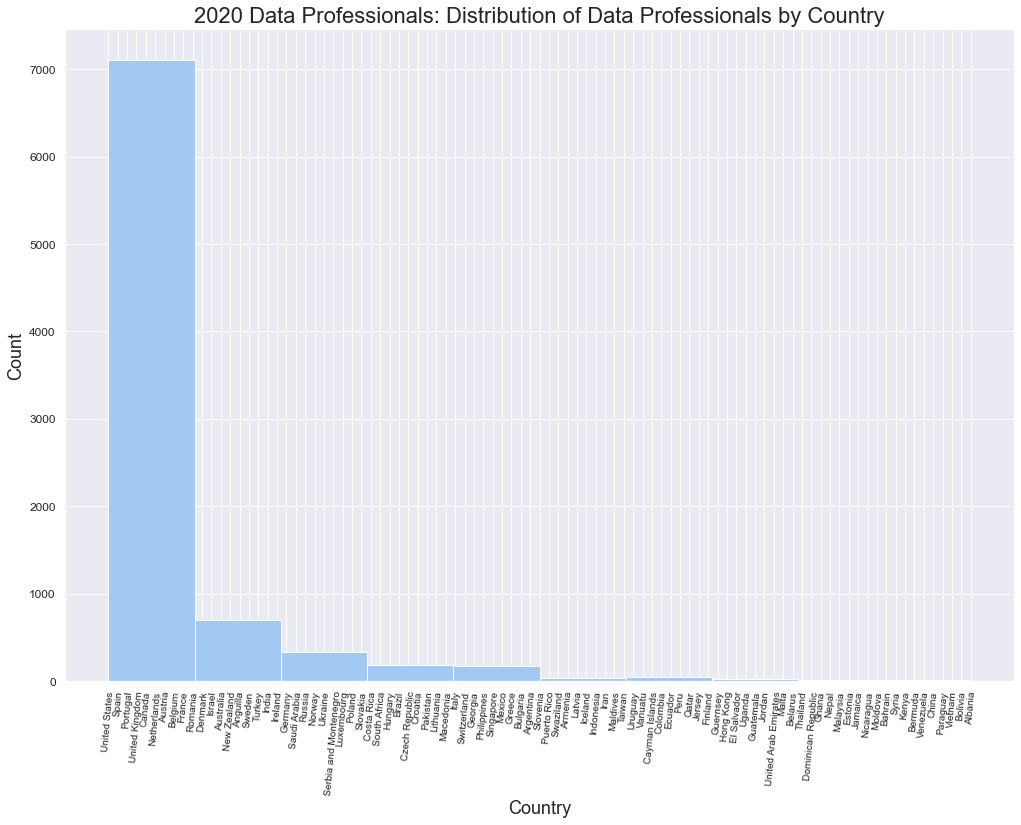

In [73]:
## Create a histogram.
## Dist of countries.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Country', fontsize=22)
plt.xticks(rotation=85, fontsize=10)
plt.yticks(fontsize=12)
data_income_cln_df['Country'].hist()

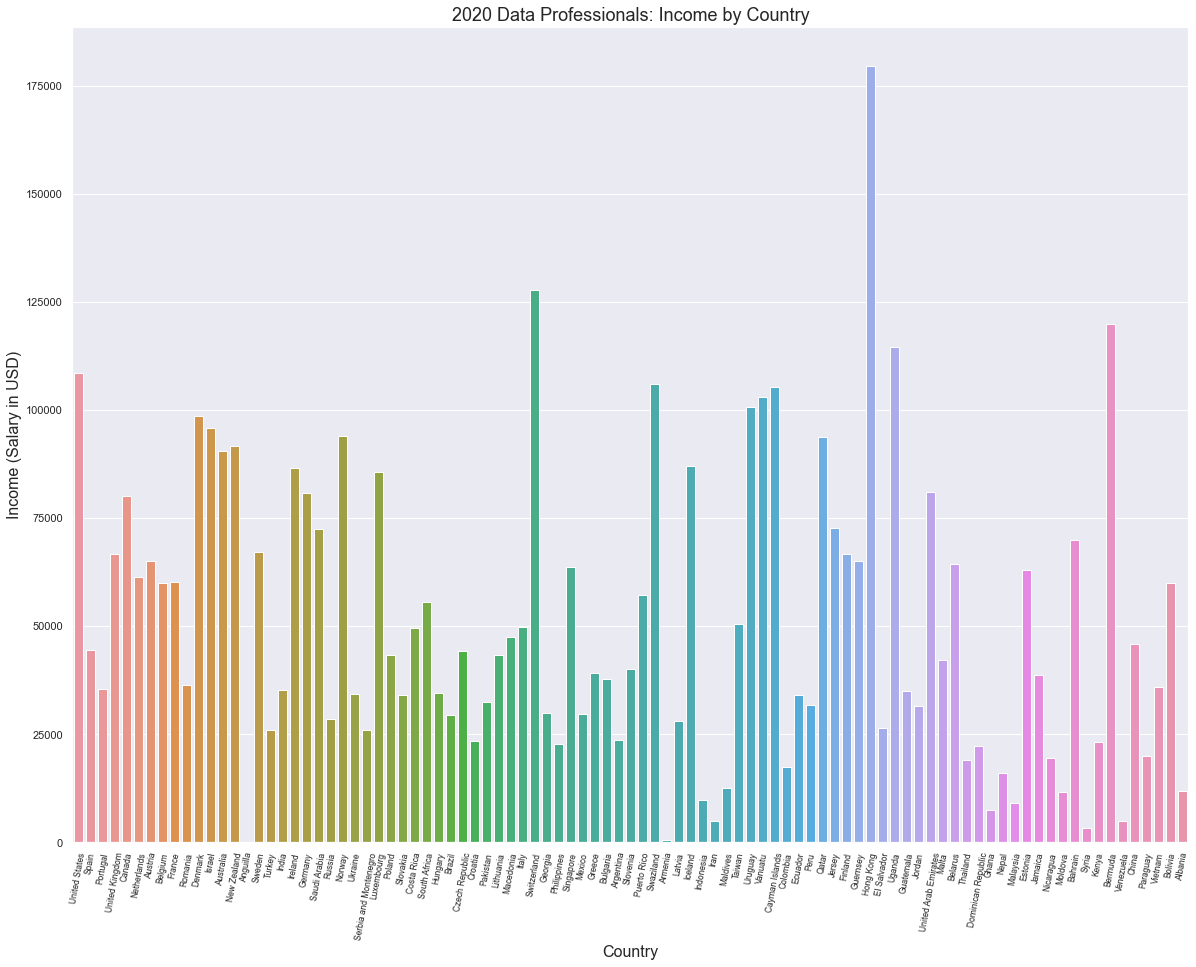

In [74]:
## Create a bar chart.
## Salary.

sns.set(rc = {'figure.figsize':(20,15)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="Country", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('2020 Data Professionals: Income by Country',fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(fontsize=8.5, rotation=80)
plt.show()

Overall, we can see:

* The greatest salary earnings came from those living in Hong Kong.
* The next greatest salary earnings came from those living in Switzerland (2), Bermuda (3), the U.S. (4), and Uganda (5).
    * The U.S. still made the top 5 in terms of salary earnings.
    * Not certain how much some of these categories and the income is related to skew.

##### Job Title, Employment Sector, Gender, and Salary (USD)

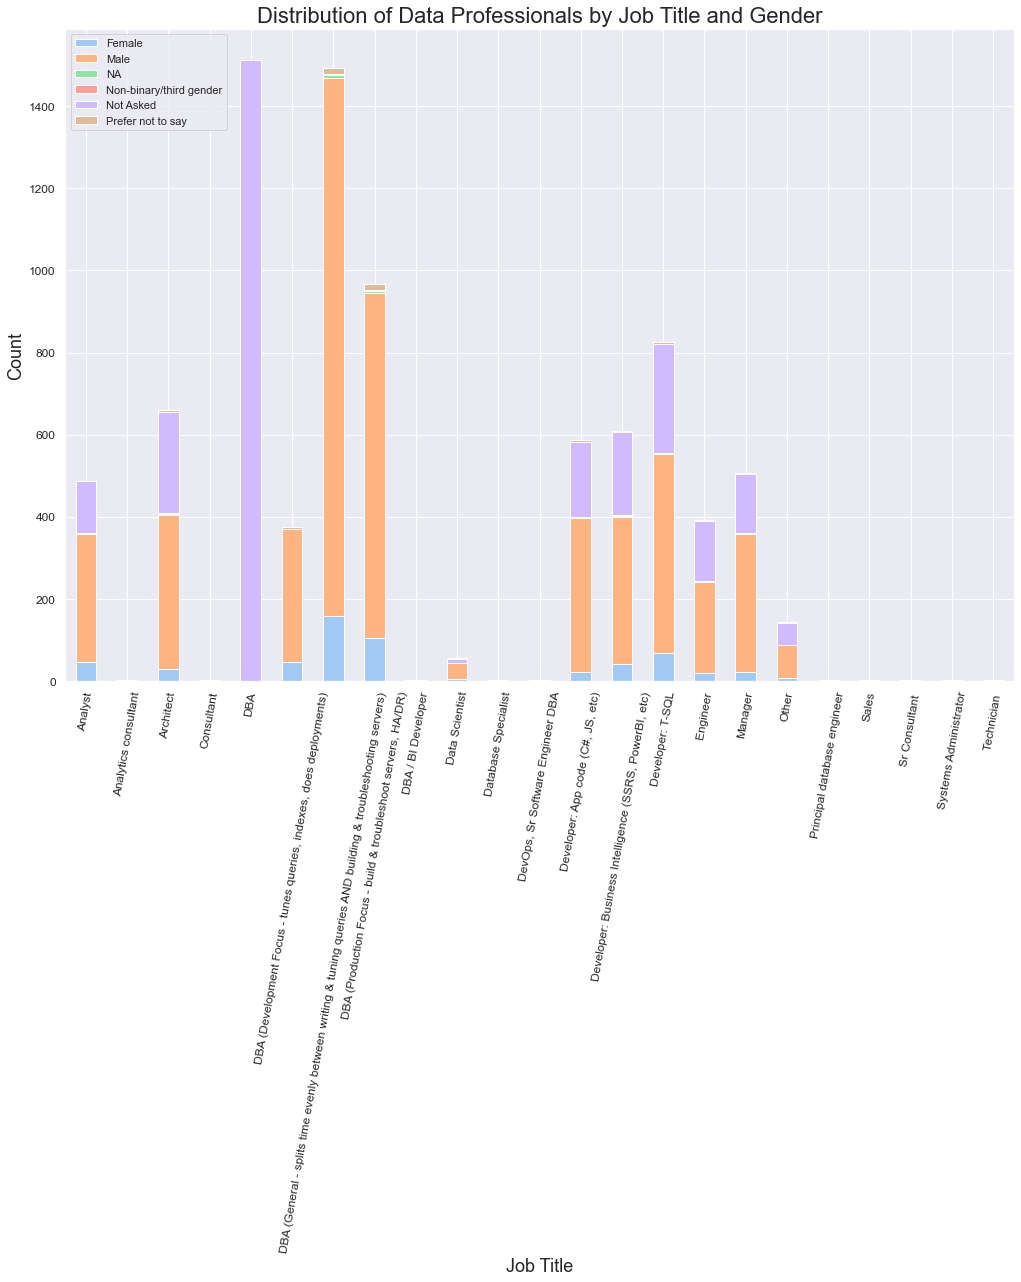

In [52]:
## Create a stacked bar chart assessing the gender distribution for each job title.

gender = data_income_cln_df.Gender
data_income_cln_df.groupby(["JobTitle", gender]).size().unstack(level=1).plot.bar(stacked=True)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Job Title', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Job Title and Gender', fontsize=22)
plt.legend(loc = 'upper left', prop={'size': 11})
## plt.tight_layout()
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.show()

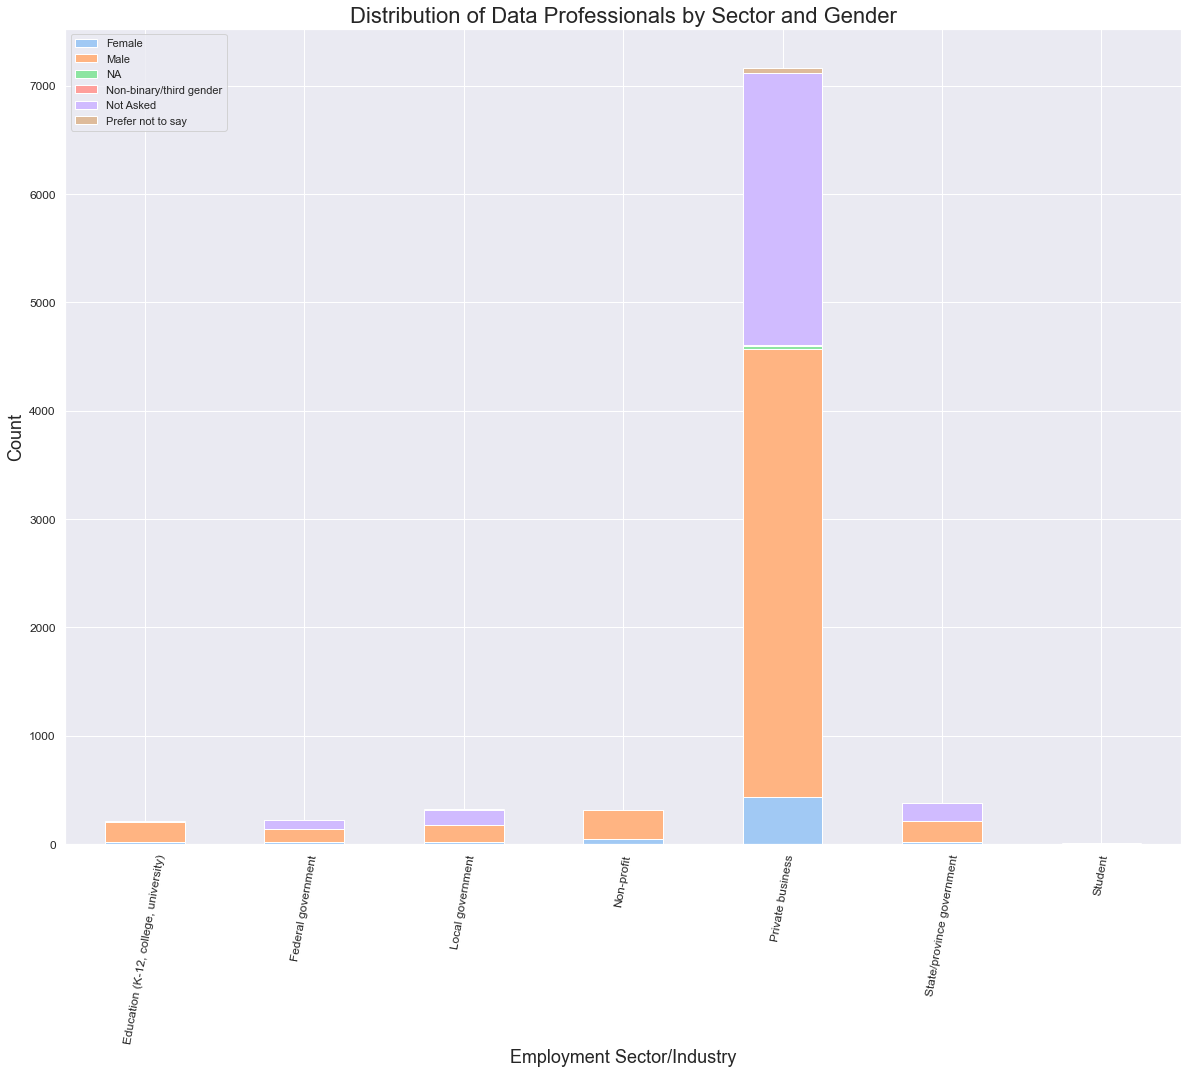

In [77]:
## Sector and Gender.
## Create a stacked bar chart assessing the gender distribution for each sector.

gender = data_income_cln_df.Gender
data_income_cln_df.groupby(["EmploymentSector", gender]).size().unstack(level=1).plot.bar(stacked=True)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Employment Sector/Industry', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Sector and Gender', fontsize=22)
plt.legend(loc = 'upper left', prop={'size': 11})
## plt.tight_layout()
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.show()

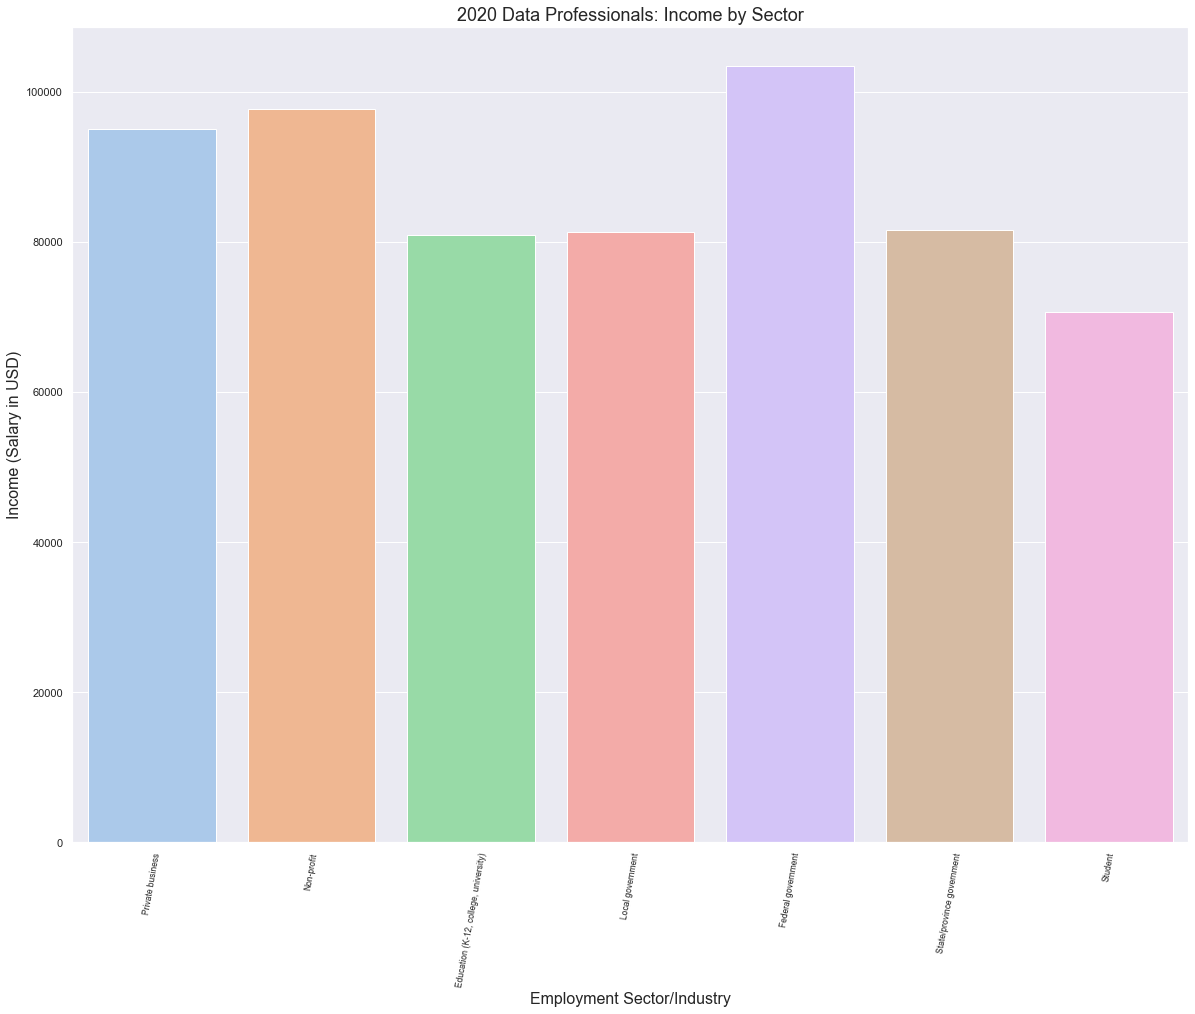

In [79]:
## Create a bar chart.
## Salary and Sector.

sns.set(rc = {'figure.figsize':(20,15)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="EmploymentSector", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('2020 Data Professionals: Income by Sector',fontsize=18)
plt.xlabel('Employment Sector/Industry', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(fontsize=8.5, rotation=80)
plt.show()

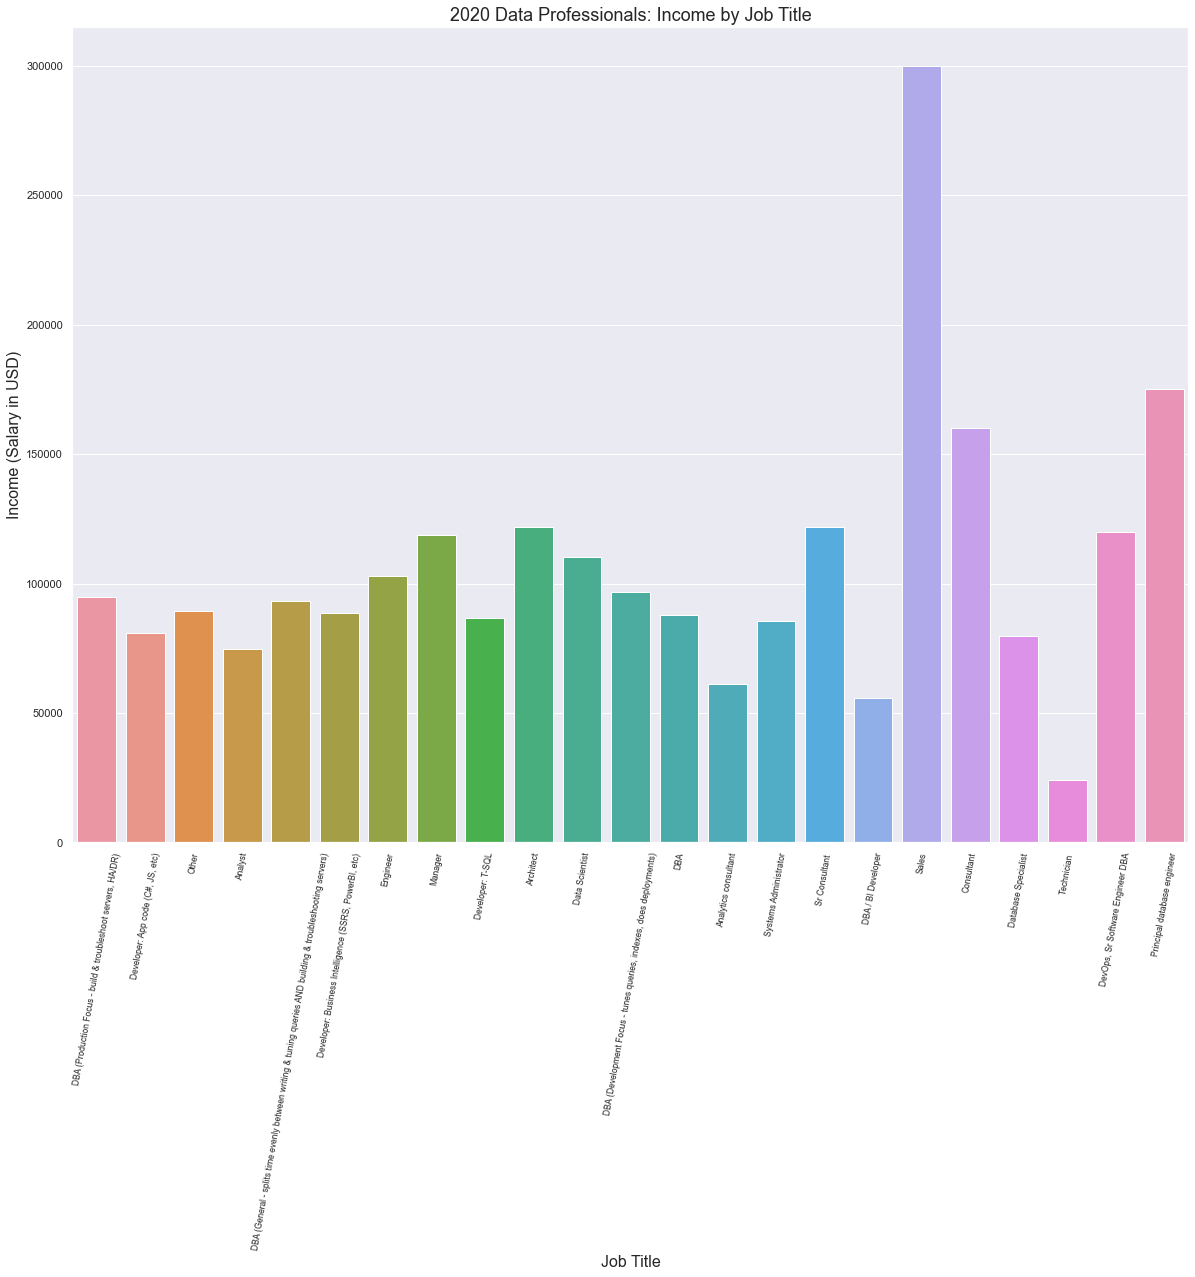

In [78]:
## Create a bar chart.
## Salary and Job Title.

sns.set(rc = {'figure.figsize':(20,15)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="JobTitle", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('2020 Data Professionals: Income by Job Title',fontsize=18)
plt.xlabel('Job Title', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(fontsize=8.5, rotation=80)
plt.show()

Overall:
* Male and Not Asked were the overwhelming majority of the data representation.
* More males than females are represented in a majority of the roles, but this could be due to the dataset impbalance of the gender classes.
* Most work in the Federal Government Sector.
* Sales garner the most income of all of the positions (although, it is common for sales to have high income).

##### Management, Years of Experience, and Salary (USD)

<AxesSubplot:title={'center':'2020 Data Professionals Distribution of Data Professionals - Management Level'}, xlabel='Manager (Manage Staff)', ylabel='Count'>

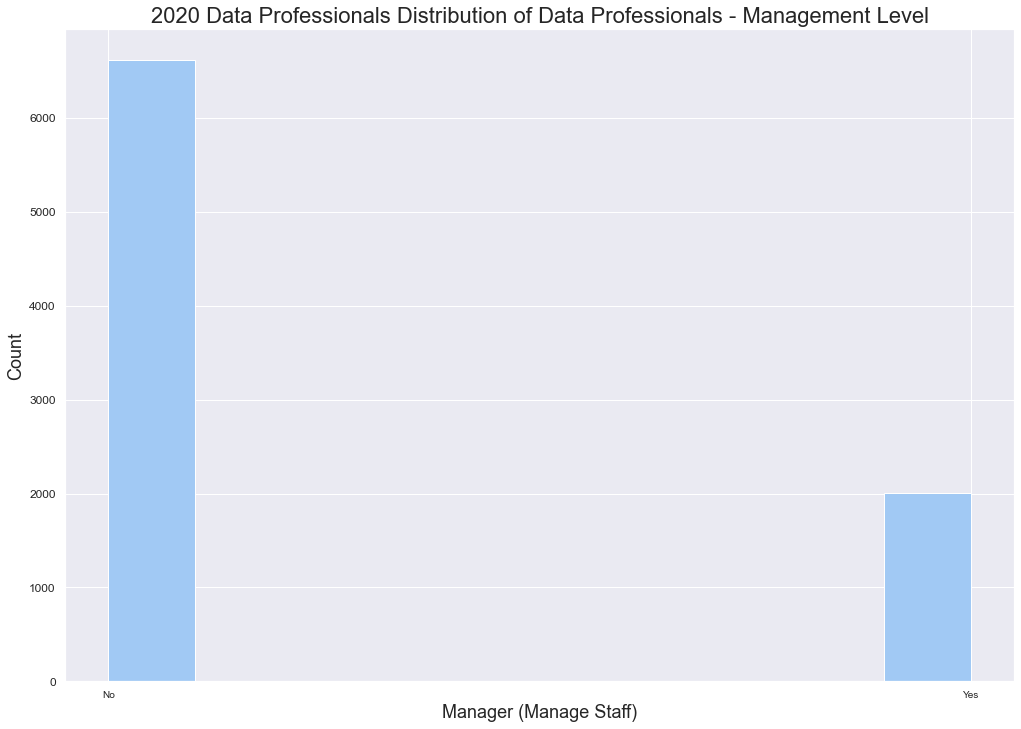

In [84]:
## Create a histogram.
## Dist of management.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.xlabel('Manager (Manage Staff)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals Distribution of Data Professionals - Management Level', fontsize=22)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
data_income_cln_df['ManageStaff'].hist()

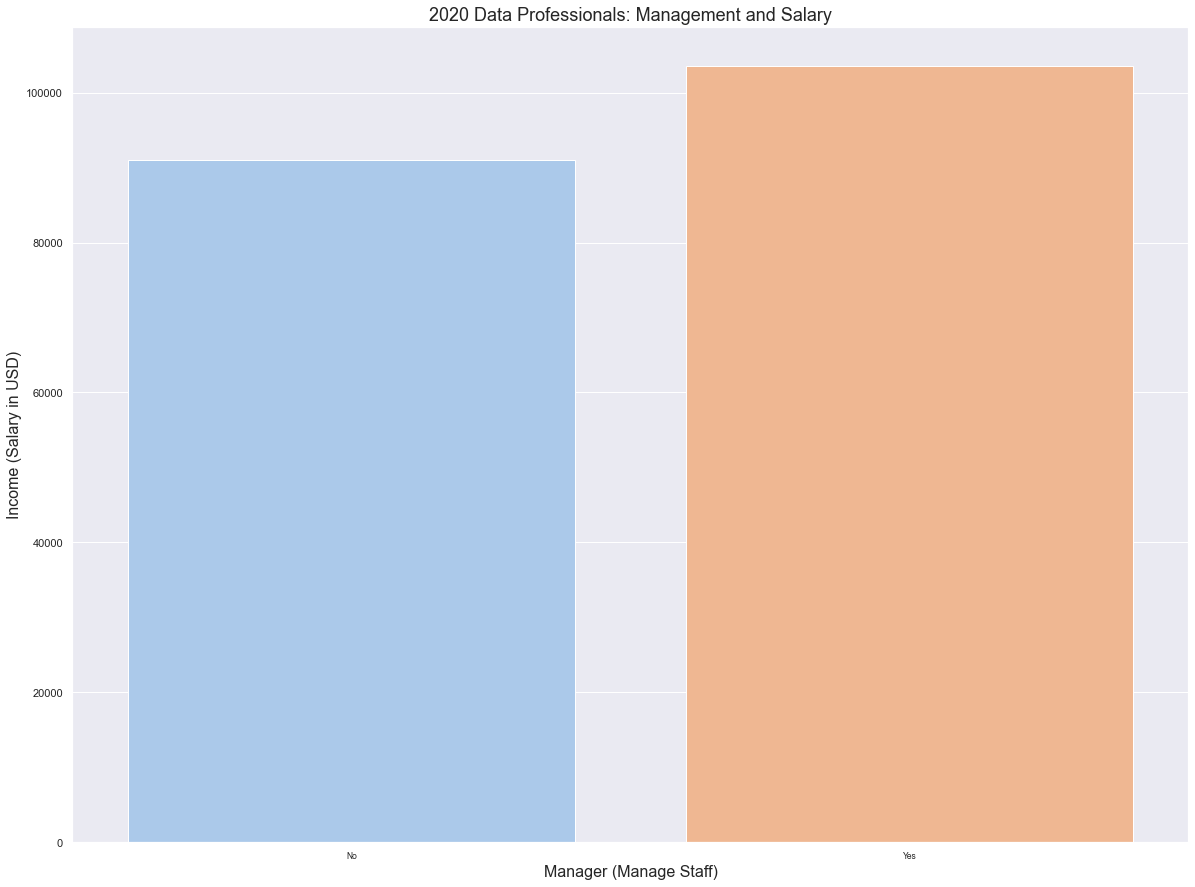

In [85]:
## Create a bar chart.
## Salary and Management.

sns.set(rc = {'figure.figsize':(20,15)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="ManageStaff", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('2020 Data Professionals: Management and Salary',fontsize=18)
plt.xlabel('Manager (Manage Staff)', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(fontsize=8.5, rotation=0)
plt.show()

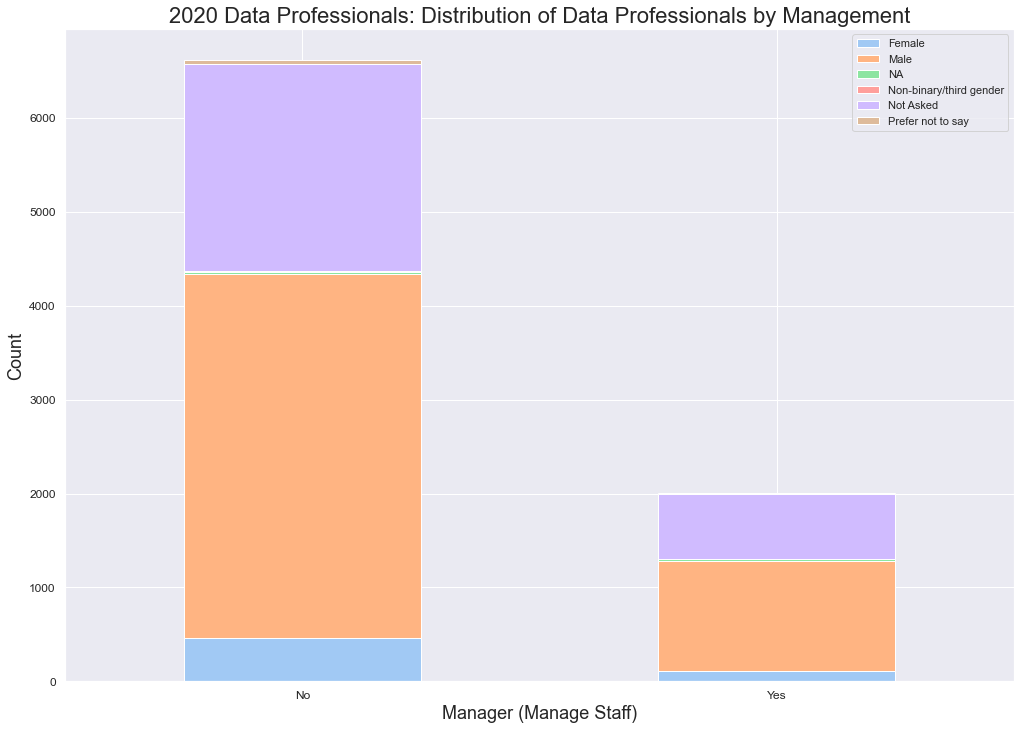

In [82]:
## By gender/with stacked gender bar charts
## Management Level and Gender.


gender = data_income_cln_df.Gender
data_income_cln_df.groupby(["ManageStaff", gender]).size().unstack(level=1).plot.bar(stacked=True)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Manager (Manage Staff)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Management & Gender', fontsize=22)
plt.legend(loc = 'upper right', prop={'size': 11})
## plt.tight_layout()
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.show()

<AxesSubplot:title={'center':'Distribution of Data Professionals by Their Years with Role'}, xlabel='Years with Type of Role', ylabel='Count'>

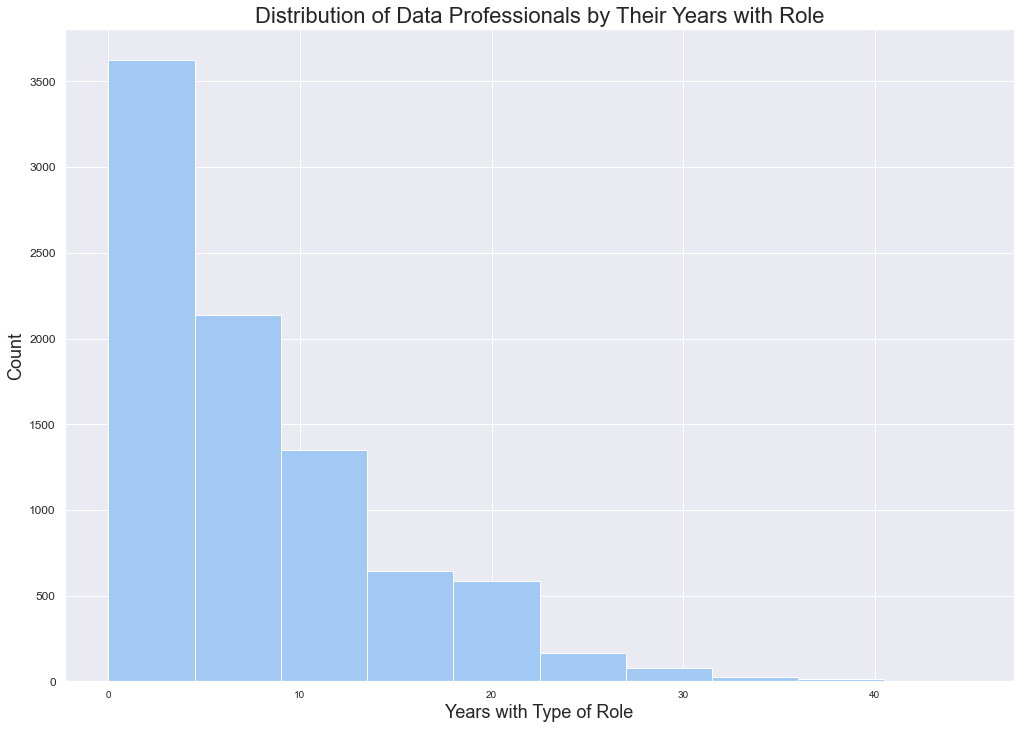

In [59]:
## Create a histogram.
## Dist of years in job.

sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.xlabel('Years with Type of Role', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Their Years with Role', fontsize=22)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
data_income_cln_df['YearsWithThisTypeOfJob'].hist()

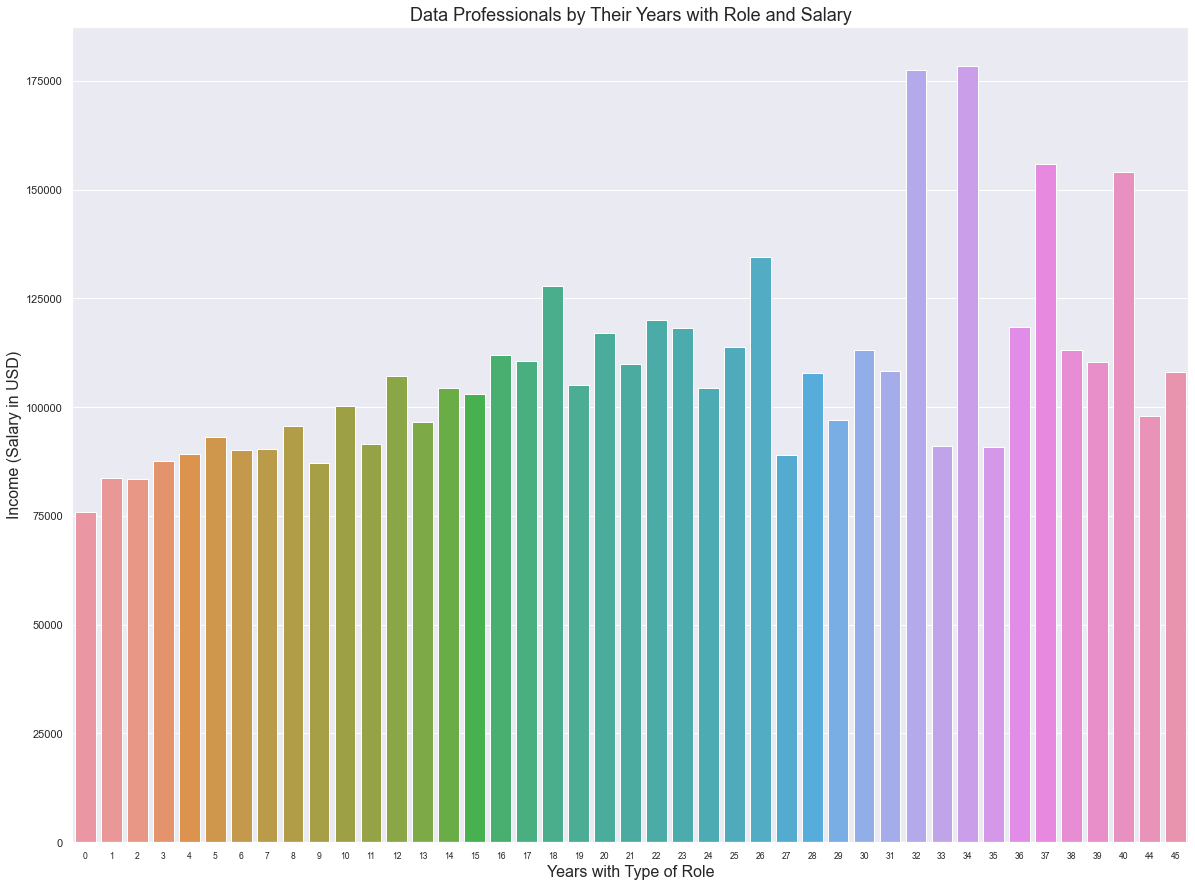

In [60]:
## Create a bar chart.
## Salary and years in job.

sns.set(rc = {'figure.figsize':(20,15)})
sns.set_palette("pastel")
## labels = []
sns.barplot(x="YearsWithThisTypeOfJob", y="SalaryUSD", data=data_income_cln_df, ci=None)
plt.title('Data Professionals by Their Years in Role and Salary',fontsize=18)
plt.xlabel('Years with Type of Role', fontsize=16)
plt.ylabel('Income (Salary in USD)', fontsize=16)
plt.xticks(fontsize=8.5, rotation=0)
plt.show()

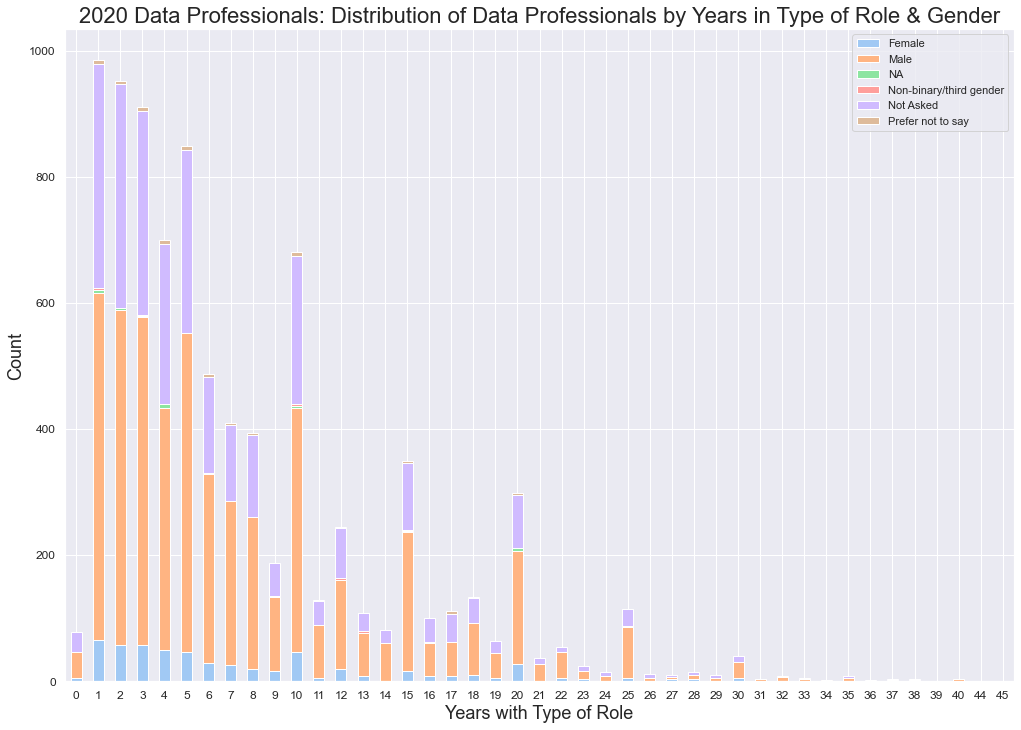

In [83]:
## By gender/with stacked gender bar charts
gender = data_income_cln_df.Gender
data_income_cln_df.groupby(["YearsWithThisTypeOfJob", gender]).size().unstack(level=1).plot.bar(stacked=True)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Years with Type of Role', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('2020 Data Professionals: Distribution of Data Professionals by Years in Type of Role & Gender', fontsize=22)
plt.legend(loc = 'upper right', prop={'size': 11})
## plt.tight_layout()
sns.set(rc = {'figure.figsize':(17,12)})
sns.set_palette("pastel")
plt.show()

Overall:
* More men are managers than women, but again, this could be due to the gender class imbalance of this dataset.
* There are fewer managers than not, but managers make more in salary.
* Most of the dataset representation has 20 years or less of experience within the specific role.
* Over time, we can see a slight increase in salary (for the most part) as years of experience within the role go up.
* The representation by years of experience by gender takes on a right-tailed distribution.


##### Linear Regressions

For this section, I will be looking into some of the above relationships further.

In [62]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dataframe.

data_income_cln_df_dum = pd.get_dummies(data_income_cln_df, columns=['Country', 'JobTitle', 'ManageStaff', 'PopulationOfLargestCityWithin20Miles', 'EmploymentSector', 'Gender'])
data_income_cln_df_dum.head()

SalaryUSD  YearsWithThisTypeOfJob  Country_Albania  Country_Anguilla  \
0     115000                       5                0                 0   
1     100000                       6                0                 0   
2     100000                       3                0                 0   
3      70000                       3                0                 0   
4     110000                      25                0                 0   

   Country_Argentina  Country_Armenia  Country_Australia  Country_Austria  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4                  0                0                  0                0   

   Country_Bahrain  Country_Belarus  Country_Belgium  Country_Bermuda  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Country_Bolivia  Country_Brazil  Country_Bulgaria  Country_Canada  \
0                0               0                 0               0   
1                0               0                 0               0   
2                0               0                 0               0   
3                0               0                 0               0   
4                0               0                 0               0   

   Country_Cayman Islands  Country_China  Country_Colombia  \
0                       0              0                 0   
1                       0              0                 0   
2                       0              0                 0   
3                       0              0                 0   
4                       0              0                 0   

   Country_Costa Rica  Country_Croatia  Country_Czech Republic  \
0                   0                0                       0   
1                   0                0                       0   
2                   0                0                       0   
3                   0                0                       0   
4                   0                0                       0   

   Country_Denmark  Country_Dominican Republic  Country_Ecuador  ...  \
0                0                           0                0  ...   
1                0                           0                0  ...   
2                0                           0                0  ...   
3                0                           0                0  ...   
4                0                           0                0  ...   

   JobTitle_Sales  JobTitle_Sr Consultant   JobTitle_Systems Administrator  \
0               0                        0                               0   
1               0                        0                               0   
2               0                        0                               0   
3               0                        0                               0   
4               0                        0                               0   

   JobTitle_Technician   ManageStaff_No  ManageStaff_Yes  \
0                     0               1                0   
1                     0               1                0   
2                     0               0                1   
3                     0               1                0   
4                     0               1                0   

   PopulationOfLargestCityWithin20Miles_100K-299K (city)  \
0                                                  0       
1                                                  0       
2   

In [63]:
## Linear regression to see relationship between variables from the data survey.
## Using the stats models formula.
## For further analysis beyond my EDA.
import statsmodels.formula.api as smf

In [64]:
## Gender and Salary.
formula = 'SalaryUSD ~ Gender'
model = smf.ols(formula, data=data_income_cln_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.127
Date:                Mon, 11 Apr 2022   Prob (F-statistic):            0.00801
Time:                        13:00:33   Log-Likelihood:            -1.0715e+05
No. Observations:                8627   AIC:                         2.143e+05
Df Residuals:                    8621   BIC:                         2.143e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          9.786e+04   2524.246     38.768      0.000    9.29e+04    1.03e+05
Gender[T.Male]                    -2459.5973   2661.210     -0.924      0.355   -7676.205    2757.010
Gender[T.NA]                       -781.4183   1.14e+04     -0.068      0.945   -2.32e+04    2.16e+04
Gender[T.Non-binary/third gender]  8621.6277   1.57e+04      0.550      0.583   -2.21e+04    3.94e+04
Gender[T.Not Asked]               -7144.7316   2758.964     -2.590      0.010   -1.26e+04   -1736.502
Gender[T.Prefer not to say]       -1.196e+04   8079.915     -1.480      0.139   -2.78e+04    3881.642
==============================================================================
Omnibus:                    13710.605   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15251141.493
Skew:                          10.027   Prob(JB):                         0.00
Kurtosis:                     208.002   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above regression analysis tells us (from the coefficient) that:
* Most of the gender groupings are negatively correlated with salary.
    * Non-binary/third gender is the exception, but very few of these people existed within the dataset.

The above regression analysis tells us (from the P>|t| value) that:
* The only truly significant p-value is for the gender grouping "Not Asked" - at 0.01.

In [65]:
## Management and Salary.
formula = 'SalaryUSD ~ ManageStaff'
model = smf.ols(formula, data=data_income_cln_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     68.40
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.54e-16
Time:                        13:00:33   Log-Likelihood:            -1.0712e+05
No. Observations:                8627   AIC:                         2.142e+05
Df Residuals:                    8625   BIC:                         2.143e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.101e+04    734.545    123.905      0.000    8.96e+04    9.25e+04
ManageStaff[T.Yes]  1.259e+04   1521.774      8.270      0.000    9602.268    1.56e+04
==============================================================================
Omnibus:                    13734.350   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15538784.384
Skew:                          10.057   Prob(JB):                         0.00
Kurtosis:                     209.939   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above regression analysis tells us (from the coefficient) that:
* Managing staff was positively correlated with salary.

The above regression analysis tells us (from the P>|t| value) that:
* The p-value is significant: 0.00 (less than 0.05 or 0.01).

In [66]:
## Gender, Management, and Salary.
formula = 'SalaryUSD ~ ManageStaff + Gender'
model = smf.ols(formula, data=data_income_cln_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.20e-16
Time:                        13:00:33   Log-Likelihood:            -1.0711e+05
No. Observations:                8627   AIC:                         2.142e+05
Df Residuals:                    8620   BIC:                         2.143e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           9.55e+04   2530.162     37.743      0.000    9.05e+04       1e+05
ManageStaff[T.Yes]                 1.271e+04   1521.959      8.349      0.000    9723.705    1.57e+04
Gender[T.Male]                    -3059.7413   2651.642     -1.154      0.249   -8257.595    2138.112
Gender[T.NA]                      -3673.8472   1.14e+04     -0.323      0.747    -2.6e+04    1.86e+04
Gender[T.Non-binary/third gender]  7598.7505   1.56e+04      0.486      0.627    -2.3e+04    3.82e+04
Gender[T.Not Asked]               -7804.5485   2749.171     -2.839      0.005   -1.32e+04   -2415.515
Gender[T.Prefer not to say]       -1.334e+04   8049.615     -1.657      0.097   -2.91e+04    2438.293
==============================================================================
Omnibus:                    13731.906   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15516064.545
Skew:                          10.054   Prob(JB):                         0.00
Kurtosis:                     209.787   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above regression analysis tells us, based upon the correlation coefficients and p-values, that:
* The combination of these variables did not drastically change which or how they had an effect on salary.

### Overall Conclusions:


From my overall analysis, I conclude that more robust analyses may need to take place.
In the preliminary EDA, it is apparent that certain pay imbalances/income gaps still exist – particularly when it comes to gender, race, household type, education, and age. From a data professionals standpoint, overall, certain jobs or sectors prove to be more fruitful.

However, even though these observations are present, I came to find that the datasets I used were not the most robust for the purposes of using them to assess or predict relationships.
I think it would prove useful and behoove those who are researching in this space to capitalize upon this via the incorporation of more data from more sources – also taking into account different types of data.
